# Language detection and preprocessing

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Read-initially-preprocessed-data" data-toc-modified-id="Read-initially-preprocessed-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Read initially preprocessed data</a></span></li></ul></li><li><span><a href="#Detect-languages" data-toc-modified-id="Detect-languages-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Detect languages</a></span><ul class="toc-item"><li><span><a href="#Detect-languages-used-in-each-review-and-return-one-with-the-highest-probability" data-toc-modified-id="Detect-languages-used-in-each-review-and-return-one-with-the-highest-probability-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Detect languages used in each review and return one with the highest probability</a></span></li><li><span><a href="#Extract-language-with-probability-higher-than-90%-otherwise-return-None" data-toc-modified-id="Extract-language-with-probability-higher-than-90%-otherwise-return-None-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Extract language with probability higher than 90% otherwise return None</a></span></li><li><span><a href="#Find-the-most-common-languages" data-toc-modified-id="Find-the-most-common-languages-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Find the most common languages</a></span></li><li><span><a href="#Find-the-most-common-languages-by-city" data-toc-modified-id="Find-the-most-common-languages-by-city-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Find the most common languages by city</a></span></li><li><span><a href="#Number-of-English-reviews" data-toc-modified-id="Number-of-English-reviews-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Number of English reviews</a></span></li></ul></li><li><span><a href="#Extract-and-save-English-and-non-English-reviews-for-adoption-analysis" data-toc-modified-id="Extract-and-save-English-and-non-English-reviews-for-adoption-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Extract and save English and non English reviews for adoption analysis</a></span></li><li><span><a href="#Preprocess-English-reviews-for-sentiment-analysis-and-topic-detection" data-toc-modified-id="Preprocess-English-reviews-for-sentiment-analysis-and-topic-detection-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Preprocess English reviews for sentiment analysis and topic detection</a></span><ul class="toc-item"><li><span><a href="#Remove-part-of-the-review-with-no-English-characters" data-toc-modified-id="Remove-part-of-the-review-with-no-English-characters-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Remove part of the review with no English characters</a></span></li><li><span><a href="#Expand-contractions" data-toc-modified-id="Expand-contractions-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Expand contractions</a></span></li><li><span><a href="#Clean-reviews,-remove-punctuations-and-numbers" data-toc-modified-id="Clean-reviews,-remove-punctuations-and-numbers-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Clean reviews, remove punctuations and numbers</a></span></li><li><span><a href="#Count-number-of-words-in-reviews" data-toc-modified-id="Count-number-of-words-in-reviews-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Count number of words in reviews</a></span></li><li><span><a href="#Plot-reviews-word-count-distribution" data-toc-modified-id="Plot-reviews-word-count-distribution-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Plot reviews word count distribution</a></span></li><li><span><a href="#Plot-reviews-word-count-distribution-in-each-city" data-toc-modified-id="Plot-reviews-word-count-distribution-in-each-city-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Plot reviews word count distribution in each city</a></span></li><li><span><a href="#Count-number-of-reviews-with-'review_word_count'-below-2.5%ile-and-above-97.5%ile" data-toc-modified-id="Count-number-of-reviews-with-'review_word_count'-below-2.5%ile-and-above-97.5%ile-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Count number of reviews with 'review_word_count' below 2.5%ile and above 97.5%ile</a></span></li><li><span><a href="#Extract-'year'-from-'date'-column" data-toc-modified-id="Extract-'year'-from-'date'-column-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Extract 'year' from 'date' column</a></span></li><li><span><a href="#Statistics-for-reviews-word-count-by-year" data-toc-modified-id="Statistics-for-reviews-word-count-by-year-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>Statistics for reviews word count by year</a></span></li><li><span><a href="#Plot-reviews-count-by-year" data-toc-modified-id="Plot-reviews-count-by-year-4.10"><span class="toc-item-num">4.10&nbsp;&nbsp;</span>Plot reviews count by year</a></span></li><li><span><a href="#Plot-reviews-count-by-city" data-toc-modified-id="Plot-reviews-count-by-city-4.11"><span class="toc-item-num">4.11&nbsp;&nbsp;</span>Plot reviews count by city</a></span></li><li><span><a href="#Plot-reviews-count-by-city-and-year" data-toc-modified-id="Plot-reviews-count-by-city-and-year-4.12"><span class="toc-item-num">4.12&nbsp;&nbsp;</span>Plot reviews count by city and year</a></span></li><li><span><a href="#Plot-mean-reviews-word-count-by-year-with-95%-confidence-interval-(CI)" data-toc-modified-id="Plot-mean-reviews-word-count-by-year-with-95%-confidence-interval-(CI)-4.13"><span class="toc-item-num">4.13&nbsp;&nbsp;</span>Plot mean reviews word count by year with 95% confidence interval (CI)</a></span></li><li><span><a href="#Statistics-reviews-word-count-by-city" data-toc-modified-id="Statistics-reviews-word-count-by-city-4.14"><span class="toc-item-num">4.14&nbsp;&nbsp;</span>Statistics reviews word count by city</a></span></li><li><span><a href="#Plot-mean-reviews-word-count-by-city-with-95%-confidence-interval-(CI)" data-toc-modified-id="Plot-mean-reviews-word-count-by-city-with-95%-confidence-interval-(CI)-4.15"><span class="toc-item-num">4.15&nbsp;&nbsp;</span>Plot mean reviews word count by city with 95% confidence interval (CI)</a></span></li><li><span><a href="#Statistics-reviews-word-count-by-city-and-year" data-toc-modified-id="Statistics-reviews-word-count-by-city-and-year-4.16"><span class="toc-item-num">4.16&nbsp;&nbsp;</span>Statistics reviews word count by city and year</a></span></li><li><span><a href="#Plot-mean-reviews-word-count-by-city-and-year-with-95%-confidence-interval-(CI)" data-toc-modified-id="Plot-mean-reviews-word-count-by-city-and-year-with-95%-confidence-interval-(CI)-4.17"><span class="toc-item-num">4.17&nbsp;&nbsp;</span>Plot mean reviews word count by city and year with 95% confidence interval (CI)</a></span></li><li><span><a href="#List-of-comments-with-word-count-between-4-and-8" data-toc-modified-id="List-of-comments-with-word-count-between-4-and-8-4.18"><span class="toc-item-num">4.18&nbsp;&nbsp;</span>List of comments with word count between 4 and 8</a></span></li><li><span><a href="#Count-number-of-reviews-with-'review_word_count'-below-8-words" data-toc-modified-id="Count-number-of-reviews-with-'review_word_count'-below-8-words-4.19"><span class="toc-item-num">4.19&nbsp;&nbsp;</span>Count number of reviews with 'review_word_count' below 8 words</a></span></li><li><span><a href="#Remove-too-short-(<8-words)-and-too-long-reviews-(>97.5%ile)" data-toc-modified-id="Remove-too-short-(<8-words)-and-too-long-reviews-(>97.5%ile)-4.20"><span class="toc-item-num">4.20&nbsp;&nbsp;</span>Remove too short (&lt;8 words) and too long reviews (&gt;97.5%ile)</a></span></li></ul></li></ul></div>

## Setup

In [2]:
import numpy as np
import pandas as pd
from langdetect import detect_langs

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import re
import string
import unicodedata
import datetime
import contractions

import warnings
warnings.filterwarnings('ignore')

In [3]:
def set_plot_styles(styles):
    mpl.rcParams.update(mpl.rcParamsDefault)
    plt.style.use(styles)
    
set_plot_styles(['mplstyle.config'])
color = sns.color_palette('tab20')

### Read initially preprocessed data

In [4]:
western_df = pd.read_pickle('western_df.pkl')
non_western_df = pd.read_pickle('non_western_df.pkl')

In [7]:
non_western_df.date.min()

'2010-03-17'

## Detect languages

### Detect languages used in each review and return one with the highest probability

In [4]:
def detect_top_language(text):
        try:
            top_language = detect_langs(text)[0]
            
            return top_language
        
        except Exception as e:
            print(text + ':' + str(e))
                  
            return None

In [5]:
#western_df['top_language'] = western_df['comments'].apply(detect_top_language)

.:No features in text.
.:No features in text.
:-):No features in text.
.:No features in text.
...:No features in text.
!:No features in text.
..:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
‍♀️:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
. :No features in text.
:):No features in text.
.:No features in text.
.:No features in text.
*^+%#:No features in text.
.:No features in text.
..:No features in text.
.:No features in text.
(-):No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
 .:No features in text.
.:No features in text.
..:No features in text.
.:No features in text.
. :No features in text.
｡:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
-:No features in text.
.:No features in text.
:):No features 

....:No features in text.
.:No features in text.
.:No features in text.
,:No features in text.
.:No features in text.
.:No features in text.
*****:No features in text.
-:No features in text.
.:No features in text.
⭐️ ⭐️ ⭐️ ⭐️ ⭐️ :No features in text.
.:No features in text.
5*:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
..:No features in text.
.:No features in text.
.:No features in text.
10/10:No features in text.
‍♂️‍♂️     :No features in text.
.:No features in text.
.:No features in text.
-:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
..:No features in text.
...:No features in text.
-:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
 .:No features in text.
.:No features in text.
-:No features in text.
.:No features in text.
⭐⭐⭐⭐⭐:No features in text.
.:No features in text.
....:No features in text.
.:No feat

/:No features in text.
 ..:No features in text.
:):No features in text.
.:No features in text.
///////:No features in text.
:):No features in text.
.:No features in text.
.:No features in text.
:):No features in text.
:):No features in text.
/:No features in text.
-:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.
:No features in text.
10/10:No features in text.
.:No features in text.
1:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
-:No features in text.
. :No features in text.
.:No features in text.
-:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
/:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
:-):No features in text.
.:No features in text.
.:No features 

.:No features in text.
.:No features in text.
.:No features in text.
=):No features in text.
.:No features in text.
.:No features in text.
呵呵:No features in text.
.:No features in text.
10/10:No features in text.
.:No features in text.
-:No features in text.
.:No features in text.
++++:No features in text.
.:No features in text.
.:No features in text.
ㅡ:No features in text.
.:No features in text.
.:No features in text.
-:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
☺️:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
:):No features in text.
.:No features in text.
.:No features in text.
_:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
10/10:No features in text.
-:No features in text.
:-):No features in text.
1:No features in text.
.:No features in text.
5*:No features in text.
.:No features in text.
.:No features in

5*:No features in text.
-:No features in text.
.:No features in text.
⭐⭐⭐⭐⭐:No features in text.
.:No features in text.
.:No features in text.
:):No features in text.
.:No features in text.
#####:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
10/10:No features in text.
1*:No features in text.
!:No features in text.
...:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
❤️:No features in text.
.:No features in text.
.:No features in text.
, 00.:No features in text.
-:No features in text.
-:No features in text.
.:No features in text.
-:No features in text.
<3:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
+:No features in text.
.:No features in text.
.:No features in text.
-:No features in text.
.:No features in text.
.:No features in text.
.:No featur

.:No features in text.
...:No features in text.
10/10:No features in text.
<3:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
,:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
~:No features in text.
.:No features in text.
?:No features in text.
...:No features in text.
.:No features in text.
—:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
-:No features in text.
.:No features in text.
.:No features in text.
+ - :No features in text.
...:No features in text.
....:No features in text.
.:No features in text.
.:No features in text.
10/10:No features in text.
.:No features in text.
5*:No features in text.
.:No features in text.
.:No features in text.
.:No feature

.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
/:No features in text.
10/10:No features in text.
:):No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
000:No features in text.
.:No features in text.
:):No features in text.
.:No features in text.
.:No features in text.
-:No features in text.
-:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
...:No features in text.
｡:No features in text.
.:No features in text.
.:No features in text.
..:No features in text.
..:No features in text.
-:No features in text.
.:No features in text.
.:No features in text.
ㅇ:No features in text.
...:No features in text.
.:No features in text.
.:No features in text.
-:No features in text.
10/10:No features in text.
5*:No features in text.
5*:No features 

.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
❤️❤️❤️:No features in text.
:):No features in text.
-:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
/:No features in text.
“:No features in text.
.:No features in text.
5*:No features in text.
.:No features in text.
｡｡:No features in text.
-:No features in text.
:):No features in text.
.:No features in text.
.:No features in text.
10/10:No features in text.
10/10:No features in text.
7:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
10/10:No features in text.
.:No features in text.
...:No features in text.
5*:No features in text.
.:No features in text.
.:No features in text.
....:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
-:No features in text.
.:No features in text.
.:No features in text.
.:No fe

.:No features in text.
-:No features in text.
:):No features in text.
-:No features in text.
.:No features in text.
10/10:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
...:No features in text.
10/10:No features in text.
.:No features in text.
:):No features in text.
-:No features in text.
.:No features in text.
5/5:No features in text.
.:No features in text.
...:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
100%:No features in text.
-:No features in text.
.:No features in text.
..:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
10/10:No features in text.
.:No features in text.
.:No features in text.
0:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
:):No features in text.
.:No features in text.
.:No feat

.:No features in text.
+1:No features in text.
.:No features in text.
:):No features in text.
. :No features in text.
.:No features in text.
.:No features in text.
-:No features in text.
.:No features in text.
.:No features in text.
10/10:No features in text.
:₩:No features in text.
.:No features in text.
:):No features in text.
.:No features in text.
-:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
♥️:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
:)9:No features in text.
.:No features in text.
666666:No features in text.
.:No features in text.
.:No features in text.
(::No features in text.
☁️:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
❤️:No features 

:):No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
-:No features in text.
.:No features in text.
.:No features in text.
:):No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
-:No features in text.
.:No features in text.
...:No features in text.
..:No features in text.
:):No features in text.
.:No features in text.
:):No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
10/10:No features in text.
.:No features in text.
5*:No features in text.
.:No features in text.
.:No features in text.
9:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
6:No features in text.

...:No features in text.
✌:No features in text.
.:No features in text.
.:No features in text.
...:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
-:No features in text.
....:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
~:No features in text.
.:No features in text.
.:No features in text.
-:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
*:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
(::No features in text.
.:No features in text.
.:No features in text.
..:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
--:No features in text.
❤️:No features in text.
.:No features in text.
.:No features in text.
9!:No features in text.
.:No features in text.
...:No features in text.
.:No features in text.
****:No features in text.
!:No features in 

.:No features in text.
:):No features in text.
.:No features in text.
:):No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
:):No features in text.
.:No features in text.
-:No features in text.
-:No features in text.
.:No features in text.
.:No features in text.
..:No features in text.
.:No features in text.
.:No features in text.
-:No features in text.
10/10:No features in text.
-:No features in text.
.:No features in text.
^_^:No features in text.
.:No features in text.
8/10:No features in text.
.:No features in text.
-:No features in text.
-:No features in text.
.:No features in text.
@:No features in text.
.:No features in text.
.:No features in text.
 .:No features in text.
-:No features in text.
.:No features in text.
--:No features in text.
.:No features in text.
.:No features in text.
!:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
:):No features in text.
.:No features in text.
******:No features

.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
-:No features in text.
1:No features in text.
.:No features in text.
.:No features in text.
5:No features in text.
.:No features in text.
 .:No features in text.
!:No features in text.
//:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
10:No features in text.
.:No features in text.

:No features in text.
-:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
...:No features in text.
.:No features in text.
⭐️⭐️⭐️⭐️⭐️:No features in text.
&:No features in text.
.:No features in text.
5⭐️⭐️⭐️⭐️⭐️:No features in text.
...:No features in text.
.:No features in text.
..:No features in text.
-:No fe

.:No features in text.
“”:No features in text.
10/10:No features in text.
-:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
❤️❤️❤️:No features in text.
.:No features in text.
-:No features in text.
.:No features in text.
❤️:No features in text.
☺️:No features in text.
@:No features in text.
.:No features in text.
11:No features in text.
.:No features in text.
.:No features in text.
:(:No features in text.
.:No features in text.
.:No features in text.
...:No features in text.
.:No features in text.
..:No features in text.
:):No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
+++++:No features in text.
,:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
..:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
0000:No features in text.
.:No fea

~:No features in text.
*****:No features in text.
:(:No features in text.
☺️:No features in text.
✌️:No features in text.
.....:No features in text.
.:No features in text.
:):No features in text.
..:No features in text.
10/10:No features in text.
.:No features in text.
.:No features in text.
..:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
10/10:No features in text.
10/10:No features in text.
-:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
:):No features in text.
.:No features in text.
-:No features in text.
8:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
8/10:No features in text.
.:No

!:No features in text.
:):No features in text.
.:No features in text.
.:No features in text.
.-.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
:):No features in text.
...:No features in text.
.:No features in text.
:):No features in text.
.:No features in text.
.:No features in text.
10/10!:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
:):No features in text.
.:No features in text.
100:No features in text.
.:No features in text.
.:No features in text.
ㅇ:No features in text.
.:No features in text.
:):No features in text.
❤️:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
1:No features in text.
:-):No features in text.
.:No features in text.
.:No features in text.
::No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features i

In [6]:
#non_western_df['top_language'] = non_western_df['comments'].apply(detect_top_language)

.:No features in text.
.:No features in text.
-:No features in text.
~:No features in text.
!!!:No features in text.
……:No features in text.
~:No features in text.
~:No features in text.
—:No features in text.
｡:No features in text.
~:No features in text.
~:No features in text.
呵呵:No features in text.
｡｡:No features in text.
6:No features in text.
｡:No features in text.
11:No features in text.
,:No features in text.
.:No features in text.
.:No features in text.
111:No features in text.
｡:No features in text.
｡｡｡:No features in text.
.:No features in text.
丶:No features in text.
❤❤❤❤❤:No features in text.
(୨୧•͈ᴗ•͈)◞ᵗʱᵃᵑᵏઽ*♡:No features in text.
:/:No features in text.
.:No features in text.
.:No features in text.
666:No features in text.
:):No features in text.
,:No features in text.
.:No features in text.
  :No features in text.
.:No features in text.
｡:No features in text.
｡:No features in text.
,:No features in text.
‍‍‍☁️❄️✈️:No features in text.
╮(╯▽╰)╭:No features in text.
｡:No fe

.:No features in text.
:):No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
...:No features in text.
:):No features in text.
***** :) :No features in text.
...:No features in text.
...:No features in text.
___________:No features in text.
.:No features in text.
.:No features in text.
10:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
70:No features in text.
10:No features in text.
!!!:No features in text.
...:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
-:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
9:No features in text.
':No features in text.
.:No features in text.
!!!:No features in text.
..:No features in text.
.:No features in text.
...:No features in text.
.:No features in text.
10:No features in text.
-:No features in text.
.:No features in text.
.:No features in t

7:No features in text.
..:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
:):No features in text.
...:No features in text.
<:No features in text.
..:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
⭐️⭐️⭐️⭐️⭐️:No features in text.
.:No features in text.
.:No features in text.
10/10:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
-:No features in text.
.:No features in text.
10:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
..:No features in text.
.:No features in text.
♥:No features in text.
.:No features in text.
.:No features in text.
.:No features 

,....:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
-:No features in text.
8:No features in text.
.:No features in text.
.:No features in text.
5:No features in text.
10:No features in text.
.:No features in text.
-:No features in text.
.:No features in text.
.:No features in text.
-:No features in text.
10:No features in text.
10:No features in text.
5 ⭐:No features in text.
⭐️⭐️⭐️⭐️⭐️:No features in text.
.:No features in text.
.:No features in text.
-:No features in text.
.:No features in text.
10:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
10:No features in text.
.:No features in text.
.:No features in text.
10:No features in text.
.:No features in text.
✔:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
...:No features in text.
10:No features in text.
.:No features in text.
.:No features in text.
...:No fea

.:No features in text.
️:No features in text.
⭐⭐⭐⭐⭐:No features in text.
ㅅㅂ:No features in text.
.:No features in text.
.:No features in text.
｡｡｡:No features in text.
...:No features in text.
.:No features in text.
10/10:No features in text.
:):No features in text.
2/5:No features in text.
..:No features in text.
.:No features in text.
-:No features in text.
-:No features in text.
.:No features in text.
.:No features in text.
. :No features in text.
.:No features in text.
.:No features in text.
. :No features in text.
:):No features in text.
...:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
-:No features in text.
::No features in text.
 :No features in text.
..:No features in text.
.:No features in text.
:):No features in text.
.:No features in text.
.:No features in text.
..:No features in text.
10:No features in text.
.:No features in text.
10:No features in text.
.:No features in text.
.:No features in text.
⭐️⭐️⭐️⭐

.:No features in text.
.:No features in text.
:):No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
:):No features in text.
❤️:No features in text.
<3:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
...:No features in text.
.:No features in text.
.:No features in text.
---:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
....:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
:):No features in text.
:):No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
10/10:No features in text.
.:No features in text.
.:No features in 

.:No features in text.
.:No features in text.
:):No features in text.
....:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
*:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
100:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
10:No features in text.
:):No features in text.
9:No features in text.
100:No features in text.
100:No features in text.
:):No features in text.
.:No features in text.
10/10! :No features in text.
.:No features in text.
100%:No features in text.
.:No features in text.
——:No features in text.
-:No features in text.
.:No features in text.
...:No features in text.
100%:No features in text.
.:No features in text.
.:No features in text.
:):No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
...:No features in text.
5 *****:No features in text.
-:No features in text.
.:No features in text.
....:No features in 

,:No features in text.
.:No features in text.
;):No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
-:No features in text.
100:No features in text.
.:No features in text.
10:No features in text.
❤️:No features in text.
...:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
✌:No features in text.
.:No features in text.
10:No features in text.
100%:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
10:No features in text.
.:No features in text.
:):No features in text.
...:No features in text.
10:No features in text.
.:No features in text.
..:No features in text.
(::No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
10:No features in text.
❤️:No features in text.
90:No features in text.
.:No features in text.
.:No features in text.
✌:No features in text.
☺️☺️:No features in text.
☺️☺️:No fe

....:No features in text.
.:No features in text.
10:No features in text.
9:No features in text.
10:No features in text.
.:No features in text.
.:No features in text.
-:No features in text.
...:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
:):No features in text.
.:No features in text.
8:No features in text.
./.:No features in text.
:):No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
...:No features in text.
.:No features in text.
-:No features in text.
....:No features in text.
.:No features in text.
❤️:No features in text.
.:No features in text.
???:No features in text.
.:No features in text.
-:No features in text.
-:No features in text.
:):No features in text.
.:No features in text.
7:No features in text.
.:No features in text.
.:No features in text.
‘:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
-:No features 

.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
..:No features in text.
.:No features in text.
...:No features in text.
...:No features in text.
...:No features in text.
...:No features in text.
...:No features in text.
.:No features in text.
...:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
,:No features in text.
.:No features in text.
.:No features in text.
✌:No features in text.
...:No features in text.
.:No features in text.
.:No features in text.
!:No features in text.
.:No features in text.
...:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
0:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
:):No features in text.
...:No features in text.
.:No features 

.:No features in text.
10:No features in text.
-:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
-:No features in text.
☝️:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
+:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
-:No features in text.
.:No features in text.
..:No features in text.
.:No features in text.
.:No features in text.
...:No features in text.
.:No features in text.
10/10⭐️:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
...:No features in text.
.:No features in text.
..:No features in text.
0:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
!!!:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in t

.:No features in text.
10:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
..:No features in text.
.:No features in text.
10:No features in text.
.:No features in text.
.:No features in text.
10 ☆:No features in text.
10!:No features in text.
7:No features in text.
...:No features in text.
...:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
7:No features in text.
.:No features in text.
.:No features in text.
10:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
10:No features in text.
7:No features in text.
.:No features in text.
7:No features in text.
.:No features in text.
7:No features in text.
.:No features in text.
10:No features in text.
.:No features in text.
.:No features in te

_:No features in text.
-:No features in text.
.:No features in text.
.:No features in text.
⭐⭐⭐⭐:No features in text.
66666:No features in text.
.:No features in text.
66666:No features in text.
｡:No features in text.
.:No features in text.
.:No features in text.
<3:No features in text.
:):No features in text.
(╹◡╹):No features in text.
10/10:No features in text.
.:No features in text.
 ,:No features in text.
.:No features in text.
...:No features in text.
.:No features in text.
.:No features in text.
冇:No features in text.
/:No features in text.
^_^:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
!!!:No features in text.
.:No features in text.
-:No features in text.
❤️:No features in text.
-:No features in text.
.:No features in text.
.:No features in text.
:):No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
☆:No features in text.
...:No features in text.
...:No features in text.
...:No features in text

.:No features in text.
^^:No features in text.
.:No features in text.
:):No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
...:No features in text.
.:No features in text.
.:No features in text.
^^:No features in text.
ㅍㅌㅊ:No features in text.
ㅎ:No features in text.
.:No features in text.
\:No features in text.
...:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
^^:No features in text.
.:No features in text.
.:No features in text.
..:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
､:No features in text.
.:No features in text.
★★★★★:No features in text.
｡:No features in text.
.:No features in text.
!:No features in text.
.:No features in text.
.:No features in text.
-:No features in text.
.:No features in text.
.:No features in text.
/:No features in text.
:):No features in text.
.:No features in text.
.:No features in t

.:No features in text.
:(:No features in text.
￮:No features in text.
.:No features in text.
-:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
,:No features in text.
❤️:No features in text.
.:No features in text.
.:No features in text.
♡♡♡♡♡:No features in text.
★★★★★:No features in text.
:):No features in text.
.:No features in text.
.:No features in text.
呵呵:No features in text.
-:No features in text.
.:No features in text.
-:No features in text.
☆☆☆☆☆:No features in text.
､:No features in text.
:):No features in text.
ㅇ:No features in text.
>:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
ㅜㅠ:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
.:No features in text.
ｵｽｽﾒ:No features in text.
 :No features in text.
,:No features in text.
.:No features

In [7]:
#western_df.to_pickle('western_df_top_language.pkl')

In [8]:
#non_western_df.to_pickle('non_western_df_top_language.pkl')

### Extract language with probability higher than 90% otherwise return None

In [4]:
western_df = pd.read_pickle('western_df_top_language.pkl')

In [5]:
non_western_df = pd.read_pickle('non_western_df_top_language.pkl')

In [6]:
def extract_language(top_language):
    if top_language is None:
        return None
    
    prob = top_language.prob
    lang = top_language.lang

    if prob > 0.9:
        return lang
        
    return None 

In [7]:
def extract_probability(top_language):
    if top_language is None:
        return None
    
    prob = top_language.prob
        
    return prob

In [8]:
western_df['language'] = western_df.top_language.apply(extract_language)
western_df['language_probability'] = western_df.top_language.apply(extract_probability)

In [9]:
non_western_df['language'] = non_western_df.top_language.apply(extract_language)
non_western_df['language_probability'] = non_western_df.top_language.apply(extract_probability)

In [10]:
list(western_df.comments[western_df.language=='en'])

["My girlfriend and I hadn't known Alina before we took the leap of faith to rent her flat. Alina just couldn't be nicer! Her flat is comfortable, homey, very sunny, and quiet at night. Her diverse neighborhood rocks! It's full of excellent eateries of varying ethnicities, good supermarkets, etc., etc. Her place is about a 10-minute walk to the Finsbury Park tube stop, and there are also several buses that ply Stroud Green Road. The Piccadilly and Victoria tube lines that serve Finsbury Park are very dependable and come frequently. My only caveat is if you are unwilling to take 20- to 40-minute commutes to downtown London attractions and money is no object, you will prefer to stay downtown. But for anyone else, you will love your experience of living in a real, untouristy neighborhood and dealing with a generous, warm-hearted woman I'm happy to call a new friend.",
 'Alina was a really good host. The flat is clean and tidy - and really close to Finsbury Park station which is quite clos

In [11]:
list(non_western_df.comments[non_western_df.language=='en'])

['Sev was very helpful.  Sev showed us where to shop and the prices we could expect to pay.  Offered his assistance after handing us the room key.  Sev is a great guy to deal with when visiting Beijing.',
 'We arrived in Beijing very early in the morning due to a delayed flight and Sev/East Apartments was very accommodating with helping us locate the building and getting us settled into the apartment. \r\nWe were traveling in a group of 5 and found this apartment to be perfect for us- we stayed in a 3 bedroom apartment and there was plenty of space as well as a kitchen, two bathrooms and a washer (although, the washer did dye one of my white shirts a faint green). \r\nOverall, we had a great time here and would definitely recommend it to anyone traveling to Beijing. The apartments look exactly like the photos that Sev has listed. \r\nIt is located Southeast of the city center and gave us a chance to explore another neighborhood. The subway line 10 Shaungjing stop is not a far walk and 

### Find the most common languages

In [12]:
western_top_languages = western_df.groupby(['language']).size().nlargest().to_frame('count')
western_top_languages

count
language         
en        2992738
fr         112850
es          74810
de          40007
it          22844

In [13]:
non_western_top_languages = non_western_df.groupby(['language']).size().nlargest().to_frame('count')
non_western_top_languages

count
language        
en        992145
es        645766
pt        254802
zh-cn     223142
ko        140568

In [14]:
non_western_df[~non_western_df.language.isnull()].groupby('city').size()

city
Beijing           171806
Belize             44281
Buenos Aires      370545
Hong Kong         168074
Mexico City       507169
Rio de Janeiro    333779
Santiago          201449
Taipei            227777
Tokyo             363625
dtype: int64

In [15]:
non_western_df[(~non_western_df.language.isnull()) & (non_western_df.language=='en')].groupby('city').size()

city
Beijing            23781
Belize             42257
Buenos Aires      119955
Hong Kong         107038
Mexico City       212349
Rio de Janeiro     85171
Santiago           45779
Taipei            111172
Tokyo             244643
dtype: int64

In [16]:
non_western_df[(~non_western_df.language.isnull()) & (non_western_df.language!='en')].groupby('city').size()

city
Beijing           148025
Belize              2024
Buenos Aires      250590
Hong Kong          61036
Mexico City       294820
Rio de Janeiro    248608
Santiago          155670
Taipei            116605
Tokyo             118982
dtype: int64

In [17]:
western_df[~western_df.language.isnull()].groupby('city').size()

city
London       1414487
Melbourne     589209
New York     1139726
Vancouver     197698
dtype: int64

In [18]:
western_df[(~western_df.language.isnull()) & (western_df.language=='en')].groupby('city').size()

city
London       1230445
Melbourne     565085
New York     1010676
Vancouver     186532
dtype: int64

In [19]:
western_df[(~western_df.language.isnull()) & (western_df.language!='en')].groupby('city').size()

city
London       184042
Melbourne     24124
New York     129050
Vancouver     11166
dtype: int64

In [94]:
non_western_df[~non_western_df.language.isnull()].count()

id                        2388505
date                      2388505
comments                  2388505
host_id                   2388505
neighbourhood_cleansed    2388505
city                      2388505
latitude                  2388505
longitude                 2388505
number_of_reviews         2388505
first_review              2388505
last_review               2388505
review_scores_rating      2388505
top_language              2388505
language                  2388505
language_probability      2388505
dtype: int64

In [95]:
western_df[~western_df.language.isnull()].count()

id                        3341120
date                      3341120
comments                  3341120
host_id                   3341120
neighbourhood_cleansed    3341120
city                      3341120
latitude                  3341120
longitude                 3341120
number_of_reviews         3341120
first_review              3341120
last_review               3341120
review_scores_rating      3341120
top_language              3341120
language                  3341120
language_probability      3341120
dtype: int64

In [20]:
total_number_reviews_non_western = non_western_df.shape[0]
total_number_none_reviews_non_western = non_western_df.language.isna().sum()
print('Total number of reviews in non-Western cities: {}'.format(total_number_reviews_non_western))
print('Total number of reviews with none language: {}'.format(total_number_none_reviews_non_western))
print('Percentage of missing observations removed is: {:.1%}'.format(total_number_none_reviews_non_western
                                                                        /total_number_reviews_non_western))

Total number of reviews in non-Western cities: 2635117
Total number of reviews with none language: 246612
Percentage of missing observations removed is: 9.4%


In [21]:
total_number_reviews_western = western_df.shape[0]
total_number_none_reviews_western = western_df.language.isna().sum()
print('Total number of reviews in Western cities: {}'.format(total_number_reviews_western))
print('Total number of reviews with none language: {}'.format(total_number_none_reviews_western))
print('Percentage of missing observations removed is: {:.1%}'.format(total_number_none_reviews_western
                                                                        /total_number_reviews_western))

Total number of reviews in Western cities: 3423217
Total number of reviews with none language: 82097
Percentage of missing observations removed is: 2.4%


### Find the most common languages by city

In [22]:
western_top_languages_by_city = western_df.groupby(['city', 'language']).size().to_frame('count')['count']\
                            .groupby(level=0, group_keys=False).apply(lambda x: x.sort_values(ascending=False).head(3))
western_top_languages_by_city

city       language
London     en          1230445
           fr            66835
           es            33670
Melbourne  en           565085
           zh-cn          6683
           ko             4302
New York   en          1010676
           fr            40308
           es            38163
Vancouver  en           186532
           fr             2441
           de             2010
Name: count, dtype: int64

In [23]:
non_western_top_languages_by_city = non_western_df.groupby(['city', 'language']).size().to_frame('count')['count']\
                            .groupby(level=0, group_keys=False).apply(lambda x: x.sort_values(ascending=False).head(3))
non_western_top_languages_by_city

city            language
Beijing         zh-cn       127054
                en           23781
                ko           17735
Belize          en           42257
                fr             681
                es             614
Buenos Aires    es          192647
                en          119955
                pt           40323
Hong Kong       en          107038
                zh-cn        33596
                ko           20418
Mexico City     es          275492
                en          212349
                pt            5414
Rio de Janeiro  pt          171328
                en           85171
                es           61439
Santiago        es          111152
                en           45779
                pt           37179
Taipei          en          111172
                ko           69482
                zh-cn        34148
Tokyo           en          244643
                ja           40448
                ko           31240
Name: count, dtype: int64

---
**FINDING**

Most frequently used language in the reviews is the official language of the country.

**Taipei** and **Tokyo** doesn't follow this rule. In both cities English language is the most common.

---

---
**Question?**

Check GDP per city to investigate why Taipei and Tokyo doesn't fit the rule?

---

### Number of English reviews

In [24]:
western_english_reviews_count = western_df.language[western_df.language == 'en'].count()
western_all_reviews_count = western_df.shape[0]

In [25]:
non_western_english_reviews_count = non_western_df.language[non_western_df.language == 'en'].count()
non_western_all_reviews_count = non_western_df.shape[0]

In [26]:
print('Total number of reviews in Western countries: {}'.format(western_all_reviews_count))
print('Total number of English reviews in Western countries: {}'.format(western_english_reviews_count))
print('Percentage of non English reviews: {:.0%}'.format(1 - (western_english_reviews_count
                                                                 /western_all_reviews_count)))

Total number of reviews in Western countries: 3423217
Total number of English reviews in Western countries: 2992738
Percentage of non English reviews: 13%


In [27]:
print('Total number of reviews in Non-Western countries: {}'.format(non_western_all_reviews_count))
print('Total number of English reviews in Non-Western countries: {}'.format(non_western_english_reviews_count))
print('Percentage of non English reviews: {:.0%}'.format(1 - (non_western_english_reviews_count
                                                         /non_western_all_reviews_count)))

Total number of reviews in Non-Western countries: 2635117
Total number of English reviews in Non-Western countries: 992145
Percentage of non English reviews: 62%


---
**FINDING**

Western countries have **87%** of English reviews.

Non-Western countries have **38%** of English reviews.

---

## Extract and save English and non English reviews for adoption analysis

Reviews with None language were removed from analysis

In [28]:
western_df_english = western_df[western_df.language == 'en'].reset_index(drop=True)
western_df_non_english = western_df[western_df.language != 'en'].dropna().reset_index(drop=True)

In [20]:
#western_df_english.to_pickle('western_df_english.pkl')
#western_df_non_english.to_pickle('western_df_non_english.pkl')

In [29]:
non_western_df_english = non_western_df[non_western_df.language == 'en'].reset_index(drop=True)
non_western_df_non_english = non_western_df[non_western_df.language != 'en'].dropna().reset_index(drop=True)

In [22]:
#non_western_df_non_english.to_pickle('non_western_df_non_english.pkl')
#non_western_df_english.to_pickle('non_western_df_english.pkl')

## Preprocess English reviews for sentiment analysis and topic detection

### Remove part of the review with no English characters

In [30]:
western_df_english = pd.read_pickle('western_df_english.pkl')
non_western_df_english = pd.read_pickle('non_western_df_english.pkl')

In [31]:
def clean_non_ascii_characters(text):
    return unicodedata.normalize('NFKD', text).encode('ascii','ignore').decode('utf-8', 'ignore')

In [32]:
western_df_english['comments_ascii'] = western_df_english.comments.apply(clean_non_ascii_characters)

In [33]:
non_western_df_english['comments_ascii'] = non_western_df_english.comments.apply(clean_non_ascii_characters)

In [34]:
non_western_df_english['difference'] = non_western_df_english['comments'].apply(len) - non_western_df_english['comments_ascii'].apply(len)

In [35]:
non_western_df_english.sort_values(by='difference', ascending=False).head()

id        date  \
275460  25118256  2019-03-06   
957534  32651600  2019-10-12   
812752  13566615  2019-05-01   
871053  21708673  2019-07-20   
675922  11921817  2016-10-17   

                                                 comments    host_id  \
275460  This was the most terrible experience I've eve...  187734311   
957534  Definitely the worst host. We do not recommend...  232445532   
812752  Conclusion First: STAY AWAY FROM HERE IF YOU D...   59973315   
871053  小学生低学年のｴﾈﾙｷﾞｰありあまる男の子と､夜帰りの遅い食べ盛りの高校生の男の子二人いる五...   54026689   
675922  2泊させてもらいました｡\n部屋の鍵は､ICﾁｯﾌﾟで事前に伝えた時間にｵｰﾅｰから手渡しし...   62065370   

       neighbourhood_cleansed       city  latitude  longitude  \
275460               Wan Chai  Hong Kong  22.27814  114.18224   
957534            Shinjuku Ku      Tokyo  35.69870  139.73294   
812752         Nishitokyo Shi      Tokyo  35.75059  139.55077   
871053              Fuchu Shi      Tokyo  35.68035  139.49265   
675922                    中山區     Taipei  25.05167  121.52243   

        number_of_reviews first_review last_review  review_scores_rating  \
275460                 53   2018-05-20  2019-11-28                  89.0   
957534                  9   2019-03-18  2020-01-03                  80.0   
812752                116   2016-06-27  2020-01-03                  97.0   
871053                 46   2018-06-27  2020-03-19                  99.0   
675922                 40   2016-03-31  2018-06-24                  97.0   

                 top_language language  language_probability  \
275460  en:0.9999961579976793       en              0.999996   
957534  en:0.9999975239596173       en              0.999998   
812752  en:0.9999977056647529       en              0.999998   
871053  en:0.9999971668955074       en              0.999997   
675922  en:0.9999951220031222       en              0.999995   

                                           comments_ascii  difference  
275460  This was the most terrible experience I've eve...        1447  
957534  Definitely the worst host. We do not recommend...        1307  
812752  Conclusion First: STAY AWAY FROM HERE IF YOU D...        1134  
871053  (2)\n\n15\n\n23\n\n\n\n(155000)\n\n(10)\n\n\n\...        1065  
675922  2\nIC\n\n()\nmrt 1\n\n9 (Phone number hidden b...        1026

In [36]:
non_western_df_english.sort_values(by='difference', ascending=False).tail()

id        date  \
782       829407  2014-02-04   
73119     239718  2013-03-24   
857220  19833823  2019-05-14   
79553     599567  2015-11-12   
546155   4455820  2017-04-03   

                                                 comments    host_id  \
782     Some say in this page that Glady's Garden is l...    4346816   
73119   OK … so really this apartment should get a fou...     530261   
857220  My worst stay in a Airbnb ! ( And i have done ...  138469445   
79553   Love this place!  First off, Mateo responded t...     417090   
546155  Cassablanca-3 was like a dream of tranquility ...    2444956   

       neighbourhood_cleansed            city  latitude  longitude  \
782                       东城区         Beijing  39.93900  116.39129   
73119                 Palermo    Buenos Aires -34.58808  -58.42147   
857220                Kita Ku           Tokyo  35.73588  139.75277   
79553                 Palermo    Buenos Aires -34.58216  -58.42111   
546155                Vidigal  Rio de Janeiro -22.99153  -43.23196   

        number_of_reviews first_review last_review  review_scores_rating  \
782                   132   2013-02-10  2019-11-10                  99.0   
73119                  20   2012-01-19  2019-11-02                  93.0   
857220                 94   2017-12-12  2020-04-15                  95.0   
79553                 104   2012-12-27  2019-12-02                  93.0   
546155                267   2014-11-24  2020-05-08                  96.0   

                 top_language language  language_probability  \
782     en:0.9999977619666793       en              0.999998   
73119   en:0.9999964960091274       en              0.999996   
857220  en:0.9999971124654787       en              0.999997   
79553   en:0.9999989089927133       en              0.999999   
546155  en:0.9999959815940471       en              0.999996   

                                           comments_ascii  difference  
782     Some say in this page that Glady's Garden is l...         -20  
73119   OK ... so really this apartment should get a f...         -21  
857220  My worst stay in a Airbnb ! ( And i have done ...         -22  
79553   Love this place!  First off, Mateo responded t...         -22  
546155  Cassablanca-3 was like a dream of tranquility ...         -36

In [37]:
non_western_df_english.comments[275460]

"This was the most terrible experience I've ever had in any hotel, any city, any country. \nSo terrible that I promise to myself I will never book any room from airbnb.\nI regretted so much that I didn't left and change to another hotel, because in the end I had to do this after several days suffering.\n\nThe rooms were dirty, wet, and noisy. When I was in it, I felt I was a pitiful homeless.\nIt seemed no one was taking care of the rooms. The host never showed up. A woman who runs two massage shops kept keys and came here to do laundries every day at 1-3am. \nYes, every night at 1-3 am, the washing machine roared, the doors were opened, the woman make telephone calls and voice-messages with the speaker.\n10 pm -1 am, new guests came.\nTwice I came back and found the door of the apartment left open without anyone in it.\n\nI really felt I had been living in a noisy 24/7 laundry room, and left earlier than I had booked on airbnb. \nIt caused some troubles to argue and get the fee for th

In [38]:
non_western_df_english.comments_ascii[275460]

"This was the most terrible experience I've ever had in any hotel, any city, any country. \nSo terrible that I promise to myself I will never book any room from airbnb.\nI regretted so much that I didn't left and change to another hotel, because in the end I had to do this after several days suffering.\n\nThe rooms were dirty, wet, and noisy. When I was in it, I felt I was a pitiful homeless.\nIt seemed no one was taking care of the rooms. The host never showed up. A woman who runs two massage shops kept keys and came here to do laundries every day at 1-3am. \nYes, every night at 1-3 am, the washing machine roared, the doors were opened, the woman make telephone calls and voice-messages with the speaker.\n10 pm -1 am, new guests came.\nTwice I came back and found the door of the apartment left open without anyone in it.\n\nI really felt I had been living in a noisy 24/7 laundry room, and left earlier than I had booked on airbnb. \nIt caused some troubles to argue and get the fee for th

In [39]:
non_western_df_english.comments[546155]

'Cassablanca-3 was like a dream of tranquility in the midst of a huge and dynamic Rio…………..Sitting to the left of the huge picture window you overlook the beautiful clear blue-green cascading waves meeting the undisturbed warmth of the Brazilian sand with an overlook of the luxurious Sheraton resort……….Shift to the right of the picture window you can’t see the resort. Your view is of the tree tops and the sensuous curves of Casablanca’s stairs winding its way down the mountain to the sea. It could be a sleepy fishing village a thousand miles from Rio.\nThe walk from Casablanca along a beautiful overlook, pedestrian and bike path to Leblon and all of services and restaurants, is just 10 minutes. We always felt safe on the well-traveled walk.\nAt first, the idea of 134 stairs seemed daunting, but the way up is beautiful. You will want to stop and rest and enjoy the view along the way…..but once you arrive the altitude is well worth the effort…………as an added bonus………our thighs were marked

In [40]:
non_western_df_english.comments_ascii[546155]

'Cassablanca-3 was like a dream of tranquility in the midst of a huge and dynamic Rio..............Sitting to the left of the huge picture window you overlook the beautiful clear blue-green cascading waves meeting the undisturbed warmth of the Brazilian sand with an overlook of the luxurious Sheraton resort..........Shift to the right of the picture window you cant see the resort. Your view is of the tree tops and the sensuous curves of Casablancas stairs winding its way down the mountain to the sea. It could be a sleepy fishing village a thousand miles from Rio.\nThe walk from Casablanca along a beautiful overlook, pedestrian and bike path to Leblon and all of services and restaurants, is just 10 minutes. We always felt safe on the well-traveled walk.\nAt first, the idea of 134 stairs seemed daunting, but the way up is beautiful. You will want to stop and rest and enjoy the view along the way.....but once you arrive the altitude is well worth the effort............as an added bonus...

### Expand contractions

In [41]:
western_df_english['comments_expanded'] = western_df_english.comments_ascii.apply(lambda text: contractions.fix(text))

In [42]:
non_western_df_english['comments_expanded'] = non_western_df_english.comments_ascii.apply(lambda text: contractions.fix(text))

In [43]:
non_western_df_english.comments_ascii[275460]

"This was the most terrible experience I've ever had in any hotel, any city, any country. \nSo terrible that I promise to myself I will never book any room from airbnb.\nI regretted so much that I didn't left and change to another hotel, because in the end I had to do this after several days suffering.\n\nThe rooms were dirty, wet, and noisy. When I was in it, I felt I was a pitiful homeless.\nIt seemed no one was taking care of the rooms. The host never showed up. A woman who runs two massage shops kept keys and came here to do laundries every day at 1-3am. \nYes, every night at 1-3 am, the washing machine roared, the doors were opened, the woman make telephone calls and voice-messages with the speaker.\n10 pm -1 am, new guests came.\nTwice I came back and found the door of the apartment left open without anyone in it.\n\nI really felt I had been living in a noisy 24/7 laundry room, and left earlier than I had booked on airbnb. \nIt caused some troubles to argue and get the fee for th

In [44]:
non_western_df_english.comments_expanded[275460]

'This was the most terrible experience I have ever had in any hotel, any city, any country. \nSo terrible that I promise to myself I will never book any room from airbnb.\nI regretted so much that I did not left and change to another hotel, because in the end I had to do this after several days suffering.\n\nThe rooms were dirty, wet, and noisy. When I was in it, I felt I was a pitiful homeless.\nIt seemed no one was taking care of the rooms. The host never showed up. A woman who runs two massage shops kept keys and came here to do laundries every day at 1-3am. \nYes, every night at 1-3 am, the washing machine roared, the doors were opened, the woman make telephone calls and voice-messages with the speaker.\n10 pm -1 am, new guests came.\nTwice I came back and found the door of the apartment left open without anyone in it.\n\nI really felt I had been living in a noisy 24/7 laundry room, and left earlier than I had booked on airbnb. \nIt caused some troubles to argue and get the fee for

In [45]:
non_western_df_english.comments_ascii[546155]

'Cassablanca-3 was like a dream of tranquility in the midst of a huge and dynamic Rio..............Sitting to the left of the huge picture window you overlook the beautiful clear blue-green cascading waves meeting the undisturbed warmth of the Brazilian sand with an overlook of the luxurious Sheraton resort..........Shift to the right of the picture window you cant see the resort. Your view is of the tree tops and the sensuous curves of Casablancas stairs winding its way down the mountain to the sea. It could be a sleepy fishing village a thousand miles from Rio.\nThe walk from Casablanca along a beautiful overlook, pedestrian and bike path to Leblon and all of services and restaurants, is just 10 minutes. We always felt safe on the well-traveled walk.\nAt first, the idea of 134 stairs seemed daunting, but the way up is beautiful. You will want to stop and rest and enjoy the view along the way.....but once you arrive the altitude is well worth the effort............as an added bonus...

In [46]:
non_western_df_english.comments_expanded[546155]

'Cassablanca-3 was like a dream of tranquility in the midst of a huge and dynamic Rio..............Sitting to the left of the huge picture window you overlook the beautiful clear blue-green cascading waves meeting the undisturbed warmth of the Brazilian sand with an overlook of the luxurious Sheraton resort..........Shift to the right of the picture window you can not see the resort. Your view is of the tree tops and the sensuous curves of Casablancas stairs winding its way down the mountain to the sea. It could be a sleepy fishing village a thousand miles from Rio.\nThe walk from Casablanca along a beautiful overlook, pedestrian and bike path to Leblon and all of services and restaurants, is just 10 minutes. We always felt safe on the well-traveled walk.\nAt first, the idea of 134 stairs seemed daunting, but the way up is beautiful. You will want to stop and rest and enjoy the view along the way.....but once you arrive the altitude is well worth the effort............as an added bonus

### Clean reviews, remove punctuations and numbers

In [47]:
def remove_punctuations_and_numbers(text):
    text = re.sub('[0-9]+', ' ', text)
    regex = re.compile('[%s]' % re.escape(re.sub('[\.!?-]', '', string.punctuation)))
    text = regex.sub(' ', text)
    text = re.sub(' -', ' ', text)
    text = re.sub('- ', ' ', text)
    text = re.sub(' +', ' ', text)
    text = re.sub('[\n\r!?]', '. ', text)
    text = re.sub(' +\.', '.', text)
    text = re.sub('\.+', '. ', text)
    text = re.sub(' +', ' ', text)
    text = re.sub('[\. ]+$', '', text)
    text = re.sub('^[\. ]+', '', text)
    return text

In [48]:
western_df_english['comments_cleaned'] = western_df_english.comments_expanded.apply(remove_punctuations_and_numbers)

In [49]:
non_western_df_english['comments_cleaned'] = non_western_df_english.comments_expanded.apply(remove_punctuations_and_numbers)

In [50]:
non_western_df_english.comments_expanded[275460]

'This was the most terrible experience I have ever had in any hotel, any city, any country. \nSo terrible that I promise to myself I will never book any room from airbnb.\nI regretted so much that I did not left and change to another hotel, because in the end I had to do this after several days suffering.\n\nThe rooms were dirty, wet, and noisy. When I was in it, I felt I was a pitiful homeless.\nIt seemed no one was taking care of the rooms. The host never showed up. A woman who runs two massage shops kept keys and came here to do laundries every day at 1-3am. \nYes, every night at 1-3 am, the washing machine roared, the doors were opened, the woman make telephone calls and voice-messages with the speaker.\n10 pm -1 am, new guests came.\nTwice I came back and found the door of the apartment left open without anyone in it.\n\nI really felt I had been living in a noisy 24/7 laundry room, and left earlier than I had booked on airbnb. \nIt caused some troubles to argue and get the fee for

In [51]:
non_western_df_english.comments_cleaned[275460]

'This was the most terrible experience I have ever had in any hotel any city any country. So terrible that I promise to myself I will never book any room from airbnb. I regretted so much that I did not left and change to another hotel because in the end I had to do this after several days suffering. The rooms were dirty wet and noisy. When I was in it I felt I was a pitiful homeless. It seemed no one was taking care of the rooms. The host never showed up. A woman who runs two massage shops kept keys and came here to do laundries every day at am. Yes every night at am the washing machine roared the doors were opened the woman make telephone calls and voice-messages with the speaker. pm am new guests came. Twice I came back and found the door of the apartment left open without anyone in it. I really felt I had been living in a noisy laundry room and left earlier than I had booked on airbnb. It caused some troubles to argue and get the fee for the left nights refunded to me. If you live h

In [52]:
non_western_df_english.comments_expanded[546155]

'Cassablanca-3 was like a dream of tranquility in the midst of a huge and dynamic Rio..............Sitting to the left of the huge picture window you overlook the beautiful clear blue-green cascading waves meeting the undisturbed warmth of the Brazilian sand with an overlook of the luxurious Sheraton resort..........Shift to the right of the picture window you can not see the resort. Your view is of the tree tops and the sensuous curves of Casablancas stairs winding its way down the mountain to the sea. It could be a sleepy fishing village a thousand miles from Rio.\nThe walk from Casablanca along a beautiful overlook, pedestrian and bike path to Leblon and all of services and restaurants, is just 10 minutes. We always felt safe on the well-traveled walk.\nAt first, the idea of 134 stairs seemed daunting, but the way up is beautiful. You will want to stop and rest and enjoy the view along the way.....but once you arrive the altitude is well worth the effort............as an added bonus

In [53]:
non_western_df_english.comments_cleaned[546155]

'Cassablanca was like a dream of tranquility in the midst of a huge and dynamic Rio. Sitting to the left of the huge picture window you overlook the beautiful clear blue-green cascading waves meeting the undisturbed warmth of the Brazilian sand with an overlook of the luxurious Sheraton resort. Shift to the right of the picture window you can not see the resort. Your view is of the tree tops and the sensuous curves of Casablancas stairs winding its way down the mountain to the sea. It could be a sleepy fishing village a thousand miles from Rio. The walk from Casablanca along a beautiful overlook pedestrian and bike path to Leblon and all of services and restaurants is just minutes. We always felt safe on the well-traveled walk. At first the idea of stairs seemed daunting but the way up is beautiful. You will want to stop and rest and enjoy the view along the way. but once you arrive the altitude is well worth the effort. as an added bonus. our thighs were markedly stronger rafter a wee

In [54]:
western_df_english.head()

id        date                                           comments  \
0  13913  2010-08-18  My girlfriend and I hadn't known Alina before ...   
1  13913  2011-07-11  Alina was a really good host. The flat is clea...   
2  13913  2011-09-13  Alina is an amazing host. She made me feel rig...   
3  13913  2011-10-03  Alina's place is so nice, the room is big and ...   
4  13913  2011-10-09  Nice location in Islington area, good for shor...   

   host_id neighbourhood_cleansed    city  latitude  longitude  \
0    54730              Islington  London  51.56802   -0.11121   
1    54730              Islington  London  51.56802   -0.11121   
2    54730              Islington  London  51.56802   -0.11121   
3    54730              Islington  London  51.56802   -0.11121   
4    54730              Islington  London  51.56802   -0.11121   

   number_of_reviews first_review last_review  review_scores_rating  \
0                 21   2010-08-18  2020-02-22                  97.0   
1                 21   2010-08-18  2020-02-22                  97.0   
2                 21   2010-08-18  2020-02-22                  97.0   
3                 21   2010-08-18  2020-02-22                  97.0   
4                 21   2010-08-18  2020-02-22                  97.0   

            top_language language  language_probability  \
0  en:0.9999975280294252       en              0.999998   
1   en:0.999995405563838       en              0.999995   
2  en:0.9999964786773441       en              0.999996   
3  en:0.9999962707667821       en              0.999996   
4  en:0.9999965951620748       en              0.999997   

                                      comments_ascii  \
0  My girlfriend and I hadn't known Alina before ...   
1  Alina was a really good host. The flat is clea...   
2  Alina is an amazing host. She made me feel rig...   
3  Alina's place is so nice, the room is big and ...   
4  Nice location in Islington area, good for shor...   

                                   comments_expanded  \
0  My girlfriend and I had not known Alina before...   
1  Alina was a really good host. The flat is clea...   
2  Alina is an amazing host. She made me feel rig...   
3  Alina's place is so nice, the room is big and ...   
4  Nice location in Islington area, good for shor...   

                                    comments_cleaned  
0  My girlfriend and I had not known Alina before...  
1  Alina was a really good host. The flat is clea...  
2  Alina is an amazing host. She made me feel rig...  
3  Alina s place is so nice the room is big and c...  
4  Nice location in Islington area good for short...

In [55]:
non_western_df_english.head()

id        date                                           comments  \
0  44054  2010-08-25  Sev was very helpful.  Sev showed us where to ...   
1  44054  2010-10-13  We arrived in Beijing very early in the mornin...   
2  44054  2011-08-11  It is a really massive apartment and really co...   
3  44054  2012-04-12  Sev was incredibly helpful, showed us around t...   
4  44054  2012-08-30  The appartment was ideal for our party of 6 ad...   

   host_id neighbourhood_cleansed     city  latitude  longitude  \
0   192875         朝阳区 / Chaoyang  Beijing  39.89425  116.45089   
1   192875         朝阳区 / Chaoyang  Beijing  39.89425  116.45089   
2   192875         朝阳区 / Chaoyang  Beijing  39.89425  116.45089   
3   192875         朝阳区 / Chaoyang  Beijing  39.89425  116.45089   
4   192875         朝阳区 / Chaoyang  Beijing  39.89425  116.45089   

   number_of_reviews first_review last_review  review_scores_rating  \
0                 99   2010-08-25  2020-01-06                  91.0   
1                 99   2010-08-25  2020-01-06                  91.0   
2                 99   2010-08-25  2020-01-06                  91.0   
3                 99   2010-08-25  2020-01-06                  91.0   
4                 99   2010-08-25  2020-01-06                  91.0   

            top_language language  language_probability  \
0  en:0.9999967253337153       en              0.999997   
1  en:0.9999968981195247       en              0.999997   
2  en:0.9999975614520605       en              0.999998   
3  en:0.9999994784090539       en              0.999999   
4   en:0.999996994879017       en              0.999997   

                                      comments_ascii  difference  \
0  Sev was very helpful.  Sev showed us where to ...           0   
1  We arrived in Beijing very early in the mornin...           0   
2  It is a really massive apartment and really co...           0   
3  Sev was incredibly helpful, showed us around t...           0   
4  The appartment was ideal for our party of 6 ad...           0   

                                   comments_expanded  \
0  Sev was very helpful.  Sev showed us where to ...   
1  We arrived in Beijing very early in the mornin...   
2  It is a really massive apartment and really co...   
3  Sev was incredibly helpful, showed us around t...   
4  The appartment was ideal for our party of 6 ad...   

                                    comments_cleaned  
0  Sev was very helpful. Sev showed us where to s...  
1  We arrived in Beijing very early in the mornin...  
2  It is a really massive apartment and really co...  
3  Sev was incredibly helpful showed us around th...  
4  The appartment was ideal for our party of adul...

In [56]:
non_western_df_english = non_western_df_english.drop('difference', axis=1)

In [50]:
western_df_english.to_pickle('western_df_english_cleaned.pkl')

In [51]:
non_western_df_english.to_pickle('non_western_df_english_cleaned.pkl')

### Count number of words in reviews

In [57]:
western_df_english = pd.read_pickle('western_df_english_cleaned.pkl')

In [58]:
non_western_df_english = pd.read_pickle('non_western_df_english_cleaned.pkl')

In [59]:
western_df_english['review_word_count'] = western_df_english.comments_cleaned.apply(lambda text: len(text.split()))

In [60]:
non_western_df_english['review_word_count'] = non_western_df_english.comments_cleaned.apply(lambda text: len(text.split()))

### Plot reviews word count distribution

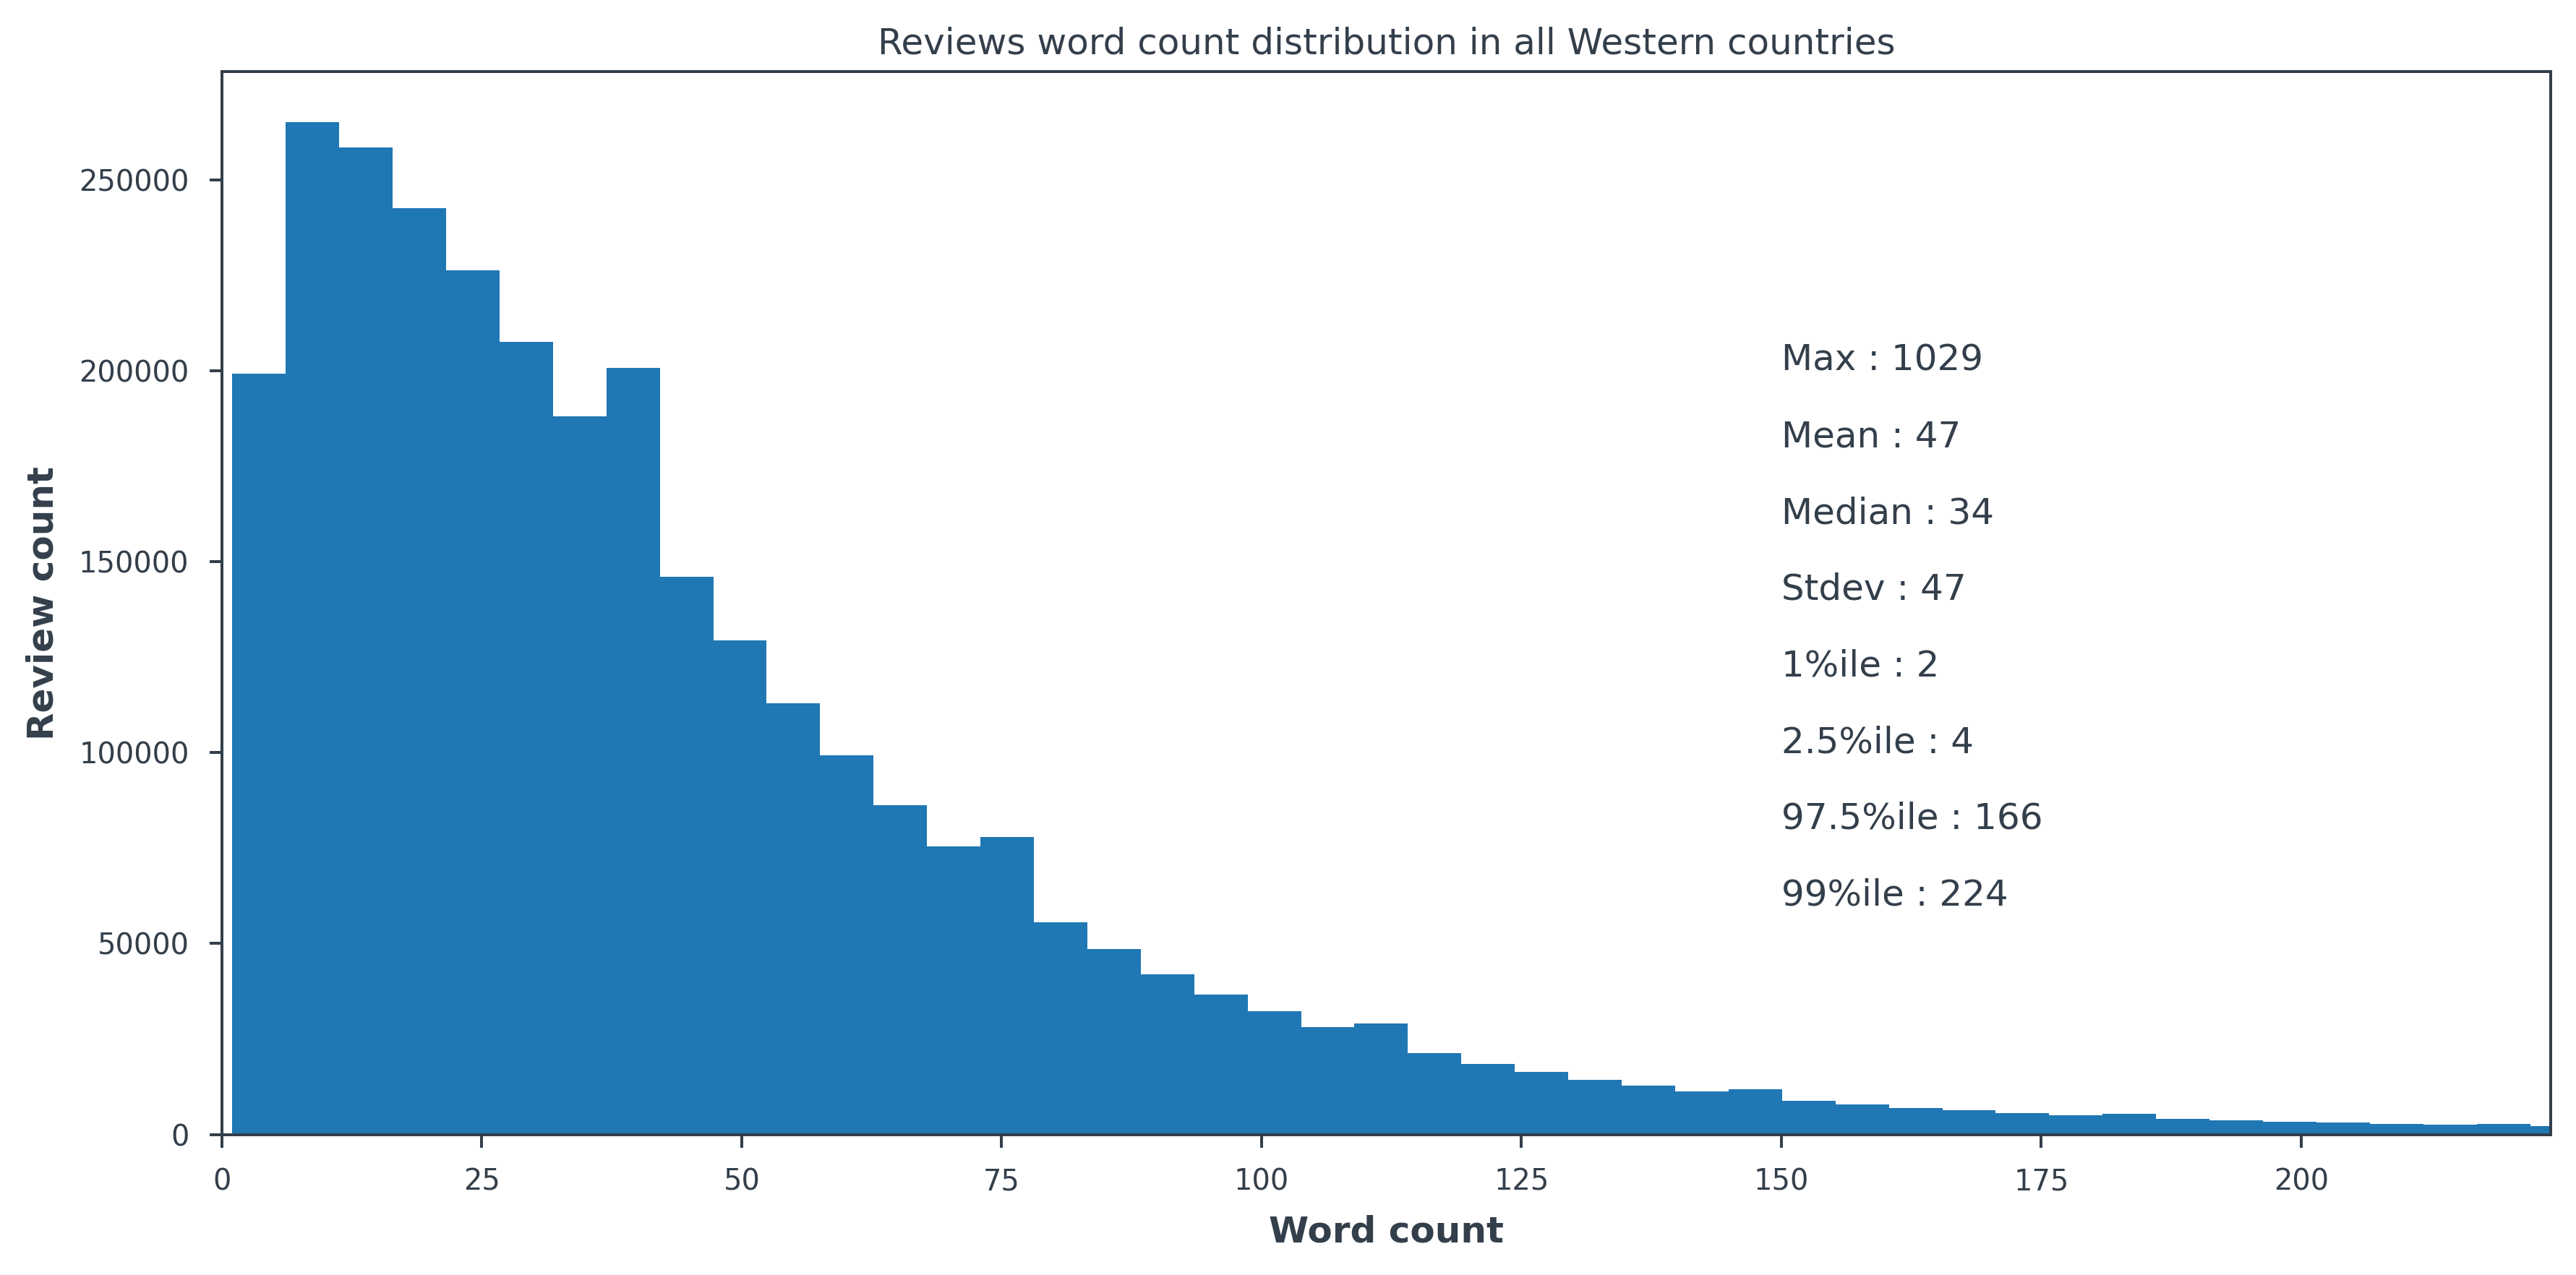

In [61]:
fig = plt.figure(figsize=(10,5))

plt.hist(western_df_english.review_word_count, bins = 200, color=color[0])

plt.text(150, 200000, 'Max : ' + str(round(np.max(western_df_english.review_word_count))))
plt.text(150, 180000, 'Mean : ' + str(round(np.mean(western_df_english.review_word_count))))
plt.text(150, 160000, 'Median : ' + str(round(np.median(western_df_english.review_word_count))))
plt.text(150, 140000, 'Stdev : ' + str(round(np.std(western_df_english.review_word_count))))
plt.text(150, 120000, '1%ile : ' + str(round(np.quantile(western_df_english.review_word_count, q=0.01))))
plt.text(150, 100000, '2.5%ile : ' + str(round(np.quantile(western_df_english.review_word_count, q=0.025))))
plt.text(150, 80000, '97.5%ile : ' + str(round(np.quantile(western_df_english.review_word_count, q=0.975))))
plt.text(150, 60000, '99%ile : ' + str(round(np.quantile(western_df_english.review_word_count, q=0.99))))


plt.gca().set(xlim=(0, np.quantile(western_df_english.review_word_count, q=0.99)))
plt.gca().yaxis.grid(False)
plt.gca().xaxis.grid(False)
plt.gca().xaxis.set_ticks(np.arange(0, np.quantile(western_df_english.review_word_count, q=0.99), 25))

plt.gca().set_ylabel('Review count', labelpad=5)
plt.gca().set_xlabel('Word count', labelpad=5)
plt.title('Reviews word count distribution in all Western countries', pad=5)

plt.tight_layout()
plt.show();

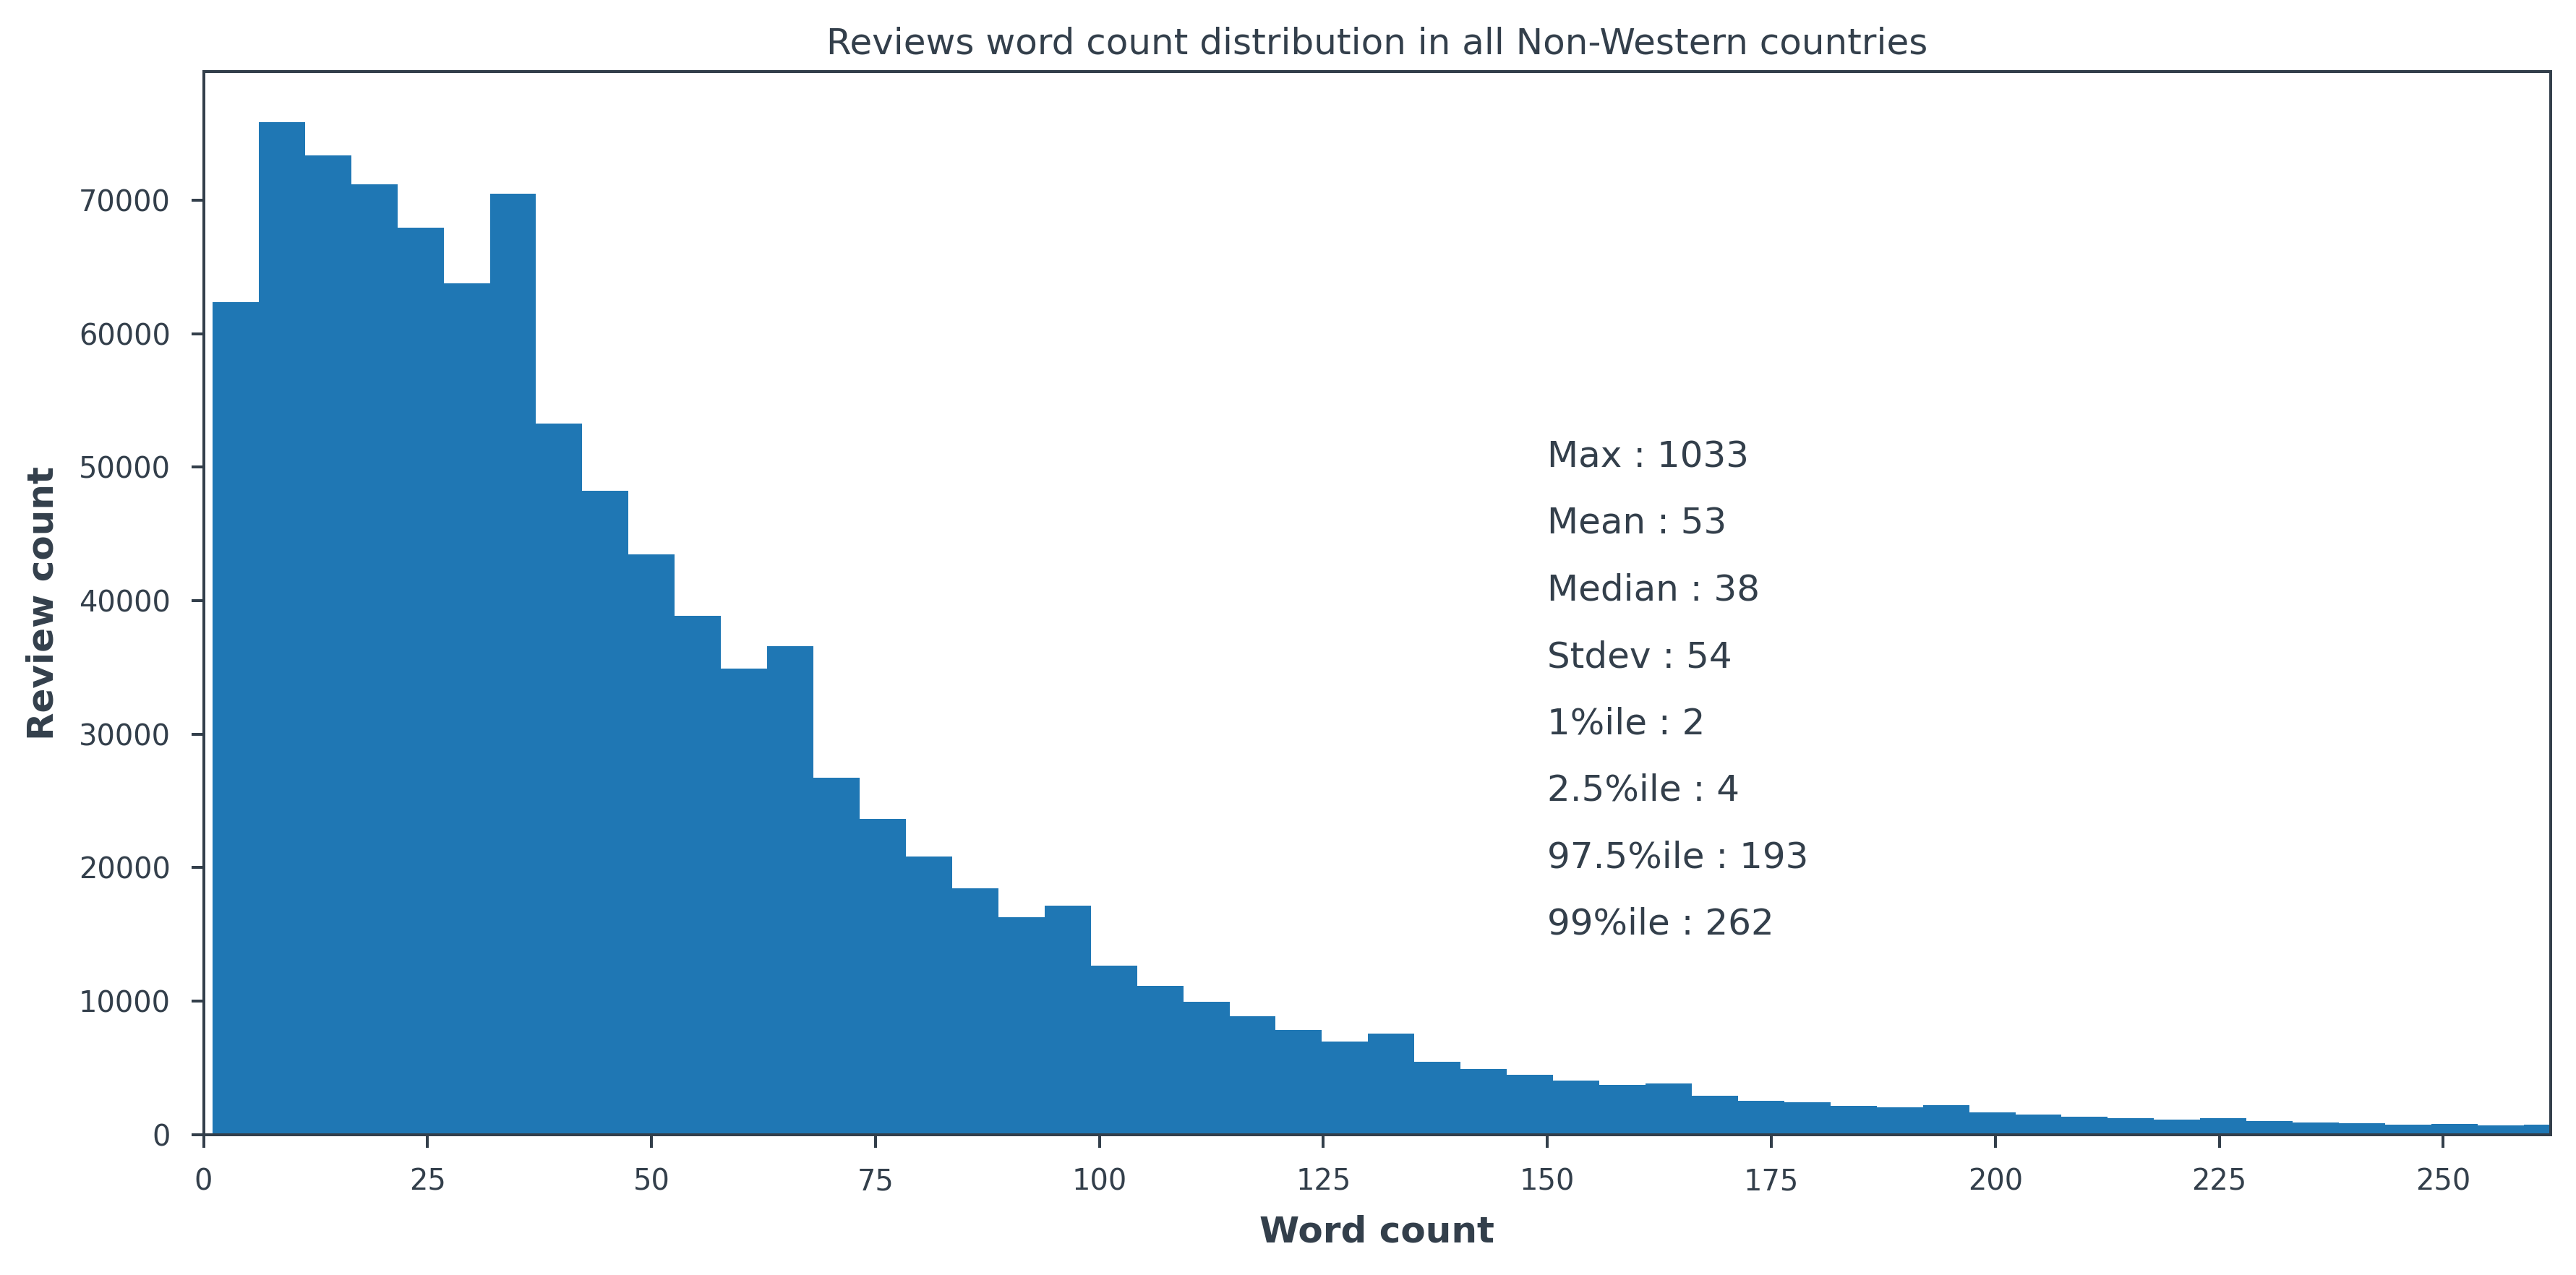

In [62]:
fig = plt.figure(figsize=(10,5))

plt.hist(non_western_df_english.review_word_count, bins = 200, color=color[0])

plt.text(150, 50000, 'Max : ' + str(round(np.max(non_western_df_english.review_word_count))))
plt.text(150, 45000, 'Mean : ' + str(round(np.mean(non_western_df_english.review_word_count))))
plt.text(150, 40000, 'Median : ' + str(round(np.median(non_western_df_english.review_word_count))))
plt.text(150, 35000, 'Stdev : ' + str(round(np.std(non_western_df_english.review_word_count))))
plt.text(150, 30000, '1%ile : ' + str(round(np.quantile(non_western_df_english.review_word_count, q=0.01))))
plt.text(150, 25000, '2.5%ile : ' + str(round(np.quantile(non_western_df_english.review_word_count, q=0.025))))
plt.text(150, 20000, '97.5%ile : ' + str(round(np.quantile(non_western_df_english.review_word_count, q=0.975))))
plt.text(150, 15000, '99%ile : ' + str(round(np.quantile(non_western_df_english.review_word_count, q=0.99))))

plt.gca().set(xlim=(0, np.quantile(non_western_df_english.review_word_count, q=0.99)))
plt.gca().yaxis.grid(False)
plt.gca().xaxis.grid(False)
plt.gca().xaxis.set_ticks(np.arange(0, np.quantile(non_western_df_english.review_word_count, q=0.99), 25))

plt.gca().set_ylabel('Review count', labelpad=5)
plt.gca().set_xlabel('Word count', labelpad=5)
plt.title('Reviews word count distribution in all Non-Western countries', pad=5)

fig.tight_layout()
plt.show();

### Plot reviews word count distribution in each city

In [63]:
def annotate(data, **kws):
    
    axes = plt.gca()
    max = np.max(data.review_word_count)
    mean = np.mean(data.review_word_count) 
    std = np.std(data.review_word_count)
    median = np.median(data.review_word_count)
    q1 = np.quantile(data.review_word_count, q=0.025)
    q2 = np.quantile(data.review_word_count, q=0.975)
    
    text = 'Max: {:.0f}'.format(max) 

    axes.annotate('Max: {:.0f}'.format(max) , xy=(0.5,0.8), xycoords='axes fraction', ha='left', fontstyle='italic')
    axes.annotate('Mean: {:.0f}'.format(mean) , xy=(0.5,0.7), xycoords='axes fraction', ha='left', fontstyle='italic')
    axes.annotate('Stdev: {:.0f}'.format(std) , xy=(0.5,0.6), xycoords='axes fraction', ha='left', fontstyle='italic')
    axes.annotate('Median: {:.0f}'.format(median) , xy=(0.5,0.5), xycoords='axes fraction', ha='left', fontstyle='italic')
    axes.annotate('2.5%ile: {:.0f}'.format(q1) , xy=(0.5,0.4), xycoords='axes fraction', ha='left', fontstyle='italic')
    axes.annotate('97.5%ile: {:.0f}'.format(q2) , xy=(0.5,0.3), xycoords='axes fraction', ha='left', fontstyle='italic')

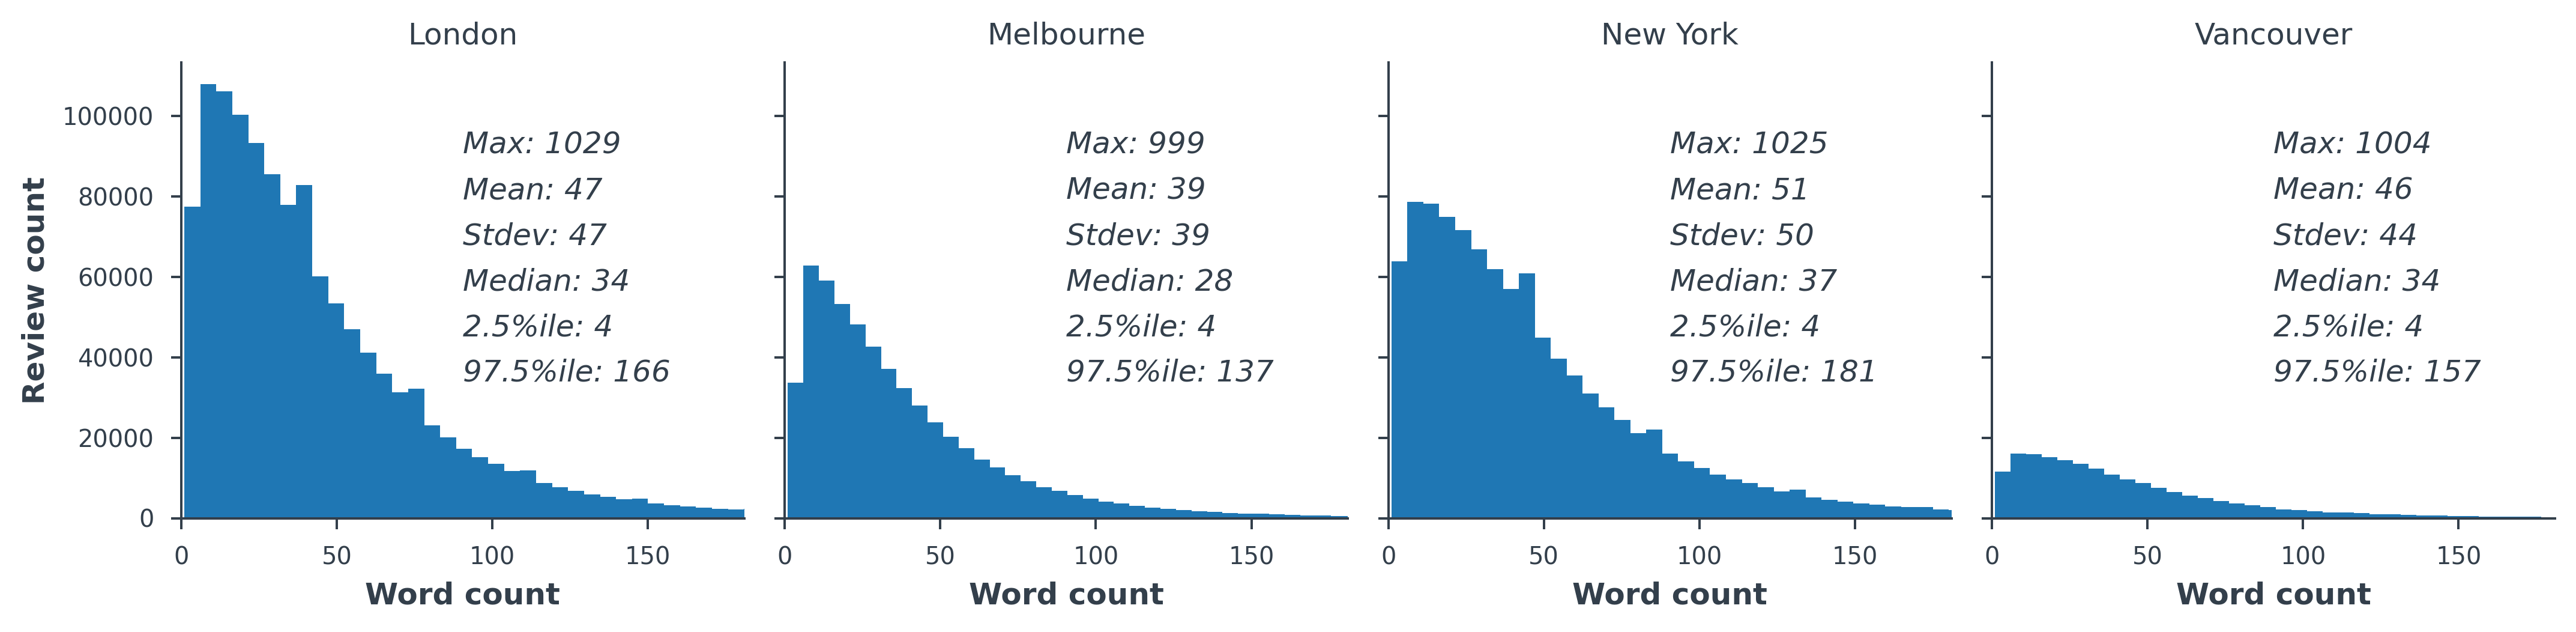

In [64]:
g = sns.FacetGrid(western_df_english, col='city', height=3, sharex=False)
g.map(plt.hist, 'review_word_count', bins=200)
g.map_dataframe(annotate)
g.set_axis_labels('Word count', 'Review count')
g.set_titles(col_template='{col_name}')
g.set(xlim=(0, western_df_english.groupby(['city'])['review_word_count'].quantile(0.975).max()))

g.fig.tight_layout(pad=1)
plt.show(g);

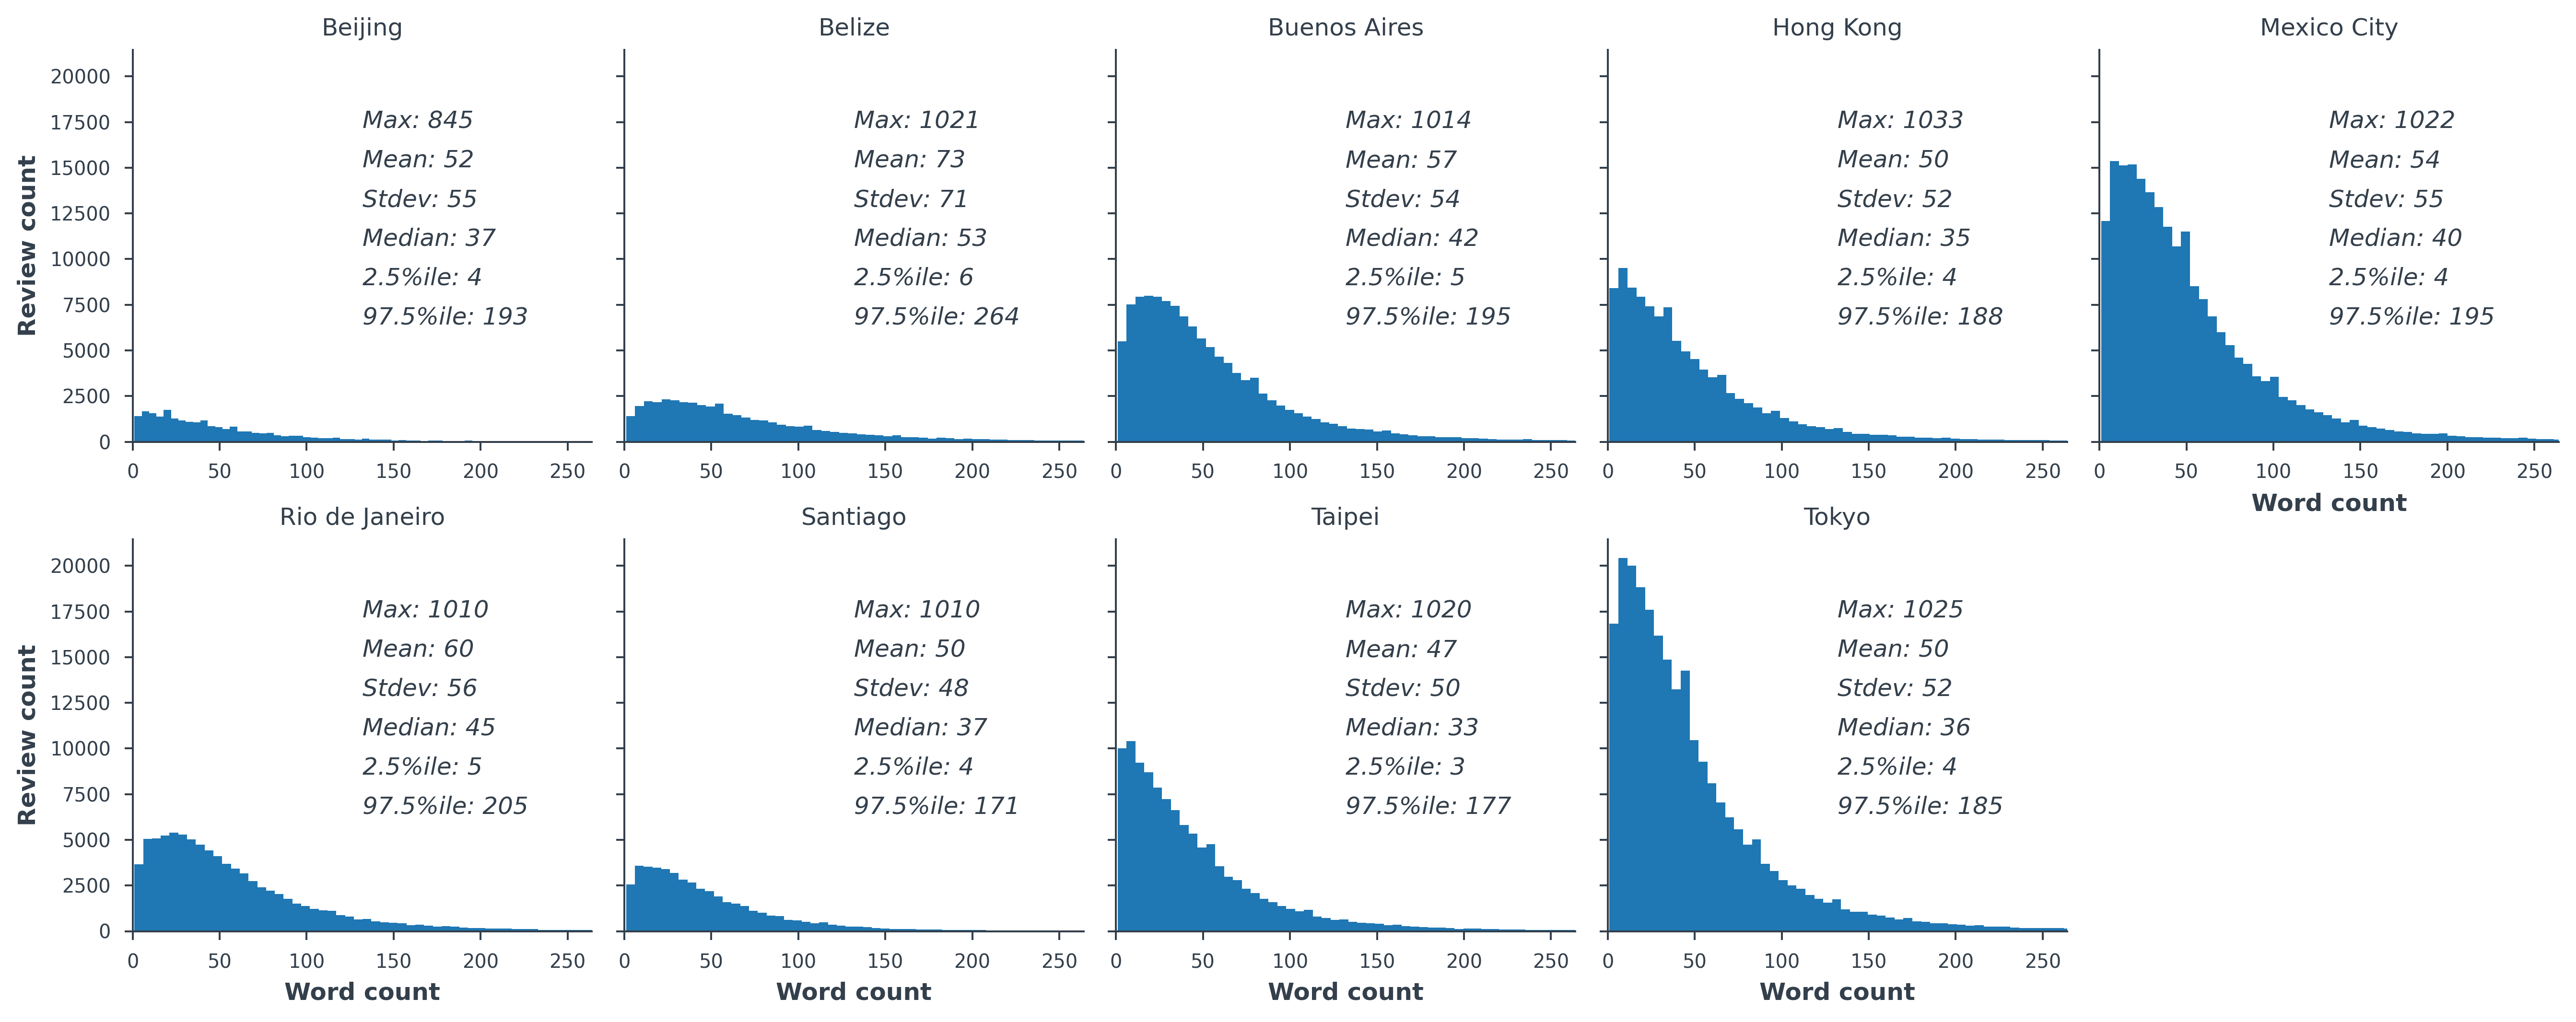

In [65]:
g = sns.FacetGrid(non_western_df_english, col='city', col_wrap=5, height=3, sharex=False)
g.map(plt.hist, 'review_word_count', bins=200)
g.map_dataframe(annotate)
g.set_axis_labels('Word count', 'Review count')
g.set_titles(col_template='{col_name}')
g.set(xlim=(0, non_western_df_english.groupby(['city'])['review_word_count'].quantile(0.975).max()))

g.fig.tight_layout(pad=1)
plt.show(g);

### Count number of reviews with 'review_word_count' below 2.5%ile and above 97.5%ile

In [66]:
print('Number of reviews with word count below 2.5%ile in Western countries: {}'.format(western_df_english.review_word_count[
                                                western_df_english['review_word_count'] < 
                                                np.quantile(western_df_english.review_word_count, q=0.025)].count()))
print('Number of reviews with word count above 97.5%ile in Western countries: {}'.format(western_df_english.review_word_count[
                                                western_df_english['review_word_count'] > 
                                                np.quantile(western_df_english.review_word_count, q=0.975)].count()))

Number of reviews with word count below 2.5%ile in Western countries: 52845
Number of reviews with word count above 97.5%ile in Western countries: 74177


In [67]:
print('Number of reviews with word count below 2.5%ile in Non-Western countries: {}'.format(non_western_df_english.review_word_count[
                                              non_western_df_english['review_word_count'] < 
                                              np.quantile(non_western_df_english.review_word_count, q=0.025)].count()))
print('Number of reviews with word count above 97.5%ile in Non-Western countries: {}'.format(non_western_df_english.review_word_count[
                                              non_western_df_english['review_word_count'] > 
                                              np.quantile(non_western_df_english.review_word_count, q=0.975)].count()))

Number of reviews with word count below 2.5%ile in Non-Western countries: 18174
Number of reviews with word count above 97.5%ile in Non-Western countries: 24699


### Extract 'year' from 'date' column

In [68]:
western_df_english['year'] = pd.DatetimeIndex(western_df_english['date']).year

In [69]:
non_western_df_english['year'] = pd.DatetimeIndex(non_western_df_english['date']).year

### Statistics for reviews word count by year

In [70]:
def q1(x):
    return x.quantile(0.01)
def q2(x):
    return x.quantile(0.025)
def q25(x):
    return x.quantile(0.25)
def q50(x):
    return x.quantile(0.50)
def q75(x):
    return x.quantile(0.75)
def q97(x):
    return x.quantile(0.975)
def q99(x):
    return x.quantile(0.99)

In [71]:
western_review_word_count_by_year = western_df_english.groupby('year')['review_word_count'].agg(['count', 
            'mean', 'median', 'std', 'min', q1, q2, q25, q50, q75, q97, q99, 'max']).fillna(0).reset_index().round()
western_review_word_count_by_year

year    count  mean  median   std  min    q1  q2  q25   q50   q75    q97  \
0   2008        1  46.0    46.0   0.0   46  46.0  46   46  46.0  46.0   46.0   
1   2009      158  69.0    58.0  56.0    3   7.0   9   32  58.0  89.0  204.0   
2   2010     1292  74.0    59.0  61.0    2   7.0   8   35  59.0  95.0  222.0   
3   2011     5733  74.0    61.0  58.0    2   7.0   8   36  61.0  96.0  224.0   
4   2012    14583  77.0    63.0  59.0    1   8.0  11   37  63.0  98.0  230.0   
5   2013    34269  75.0    61.0  58.0    1   7.0  10   37  61.0  95.0  225.0   
6   2014    72023  74.0    60.0  56.0    1   7.0  11   37  60.0  94.0  218.0   
7   2015   153670  68.0    55.0  53.0    1   6.0   9   33  55.0  87.0  206.0   
8   2016   294628  59.0    47.0  50.0    1   4.0   6   27  47.0  76.0  188.0   
9   2017   459341  47.0    35.0  44.0    1   3.0   4   18  35.0  61.0  162.0   
10  2018   699687  43.0    31.0  43.0    1   2.0   4   16  31.0  56.0  154.0   
11  2019  1025129  41.0    29.0  44.0    1   2.0   4   14  29.0  52.0  151.0   
12  2020   232224  38.0    25.0  43.0    1   2.0   3   12  25.0  48.0  147.0   

      q99   max  
0    46.0    46  
1   235.0   446  
2   337.0   512  
3   292.0   507  
4   305.0   849  
5   297.0   517  
6   281.0   566  
7   267.0   520  
8   248.0   566  
9   215.0   550  
10  208.0  1029  
11  209.0  1025  
12  206.0  1014

In [72]:
non_western_review_word_count_by_year = non_western_df_english.groupby('year')['review_word_count'].agg(['count', 
            'mean', 'median', 'std', 'min', q1, q2, q25, q50, q75, q97, q99, 'max']).fillna(0).reset_index().round()
non_western_review_word_count_by_year

year   count  mean  median   std  min    q1  q2  q25  q50    q75    q97  \
0   2010      81  84.0      58  80.0   13  15.0  17   30   58  124.0  287.0   
1   2011    1040  81.0      63  66.0    2   7.0   9   38   63  105.0  257.0   
2   2012    4287  83.0      67  67.0    1   7.0  10   40   67  105.0  262.0   
3   2013   10030  84.0      67  67.0    1   7.0  10   41   67  106.0  263.0   
4   2014   22336  81.0      64  65.0    1   6.0  10   38   64  103.0  259.0   
5   2015   44363  75.0      59  62.0    1   6.0   9   35   59   96.0  239.0   
6   2016   92283  66.0      51  57.0    1   4.0   6   28   51   85.0  218.0   
7   2017  142169  54.0      40  52.0    1   2.0   4   21   40   70.0  191.0   
8   2018  227509  51.0      37  51.0    1   2.0   4   18   37   66.0  184.0   
9   2019  355847  47.0      33  51.0    1   2.0   4   16   33   61.0  177.0   
10  2020   92200  47.0      32  53.0    1   2.0   4   15   32   60.0  179.0   

      q99   max  
0   359.0   462  
1   341.0   500  
2   336.0   703  
3   345.0   511  
4   336.0   514  
5   313.0   512  
6   288.0   523  
7   255.0   522  
8   249.0  1025  
9   244.0  1033  
10  249.0  1022

### Plot reviews count by year

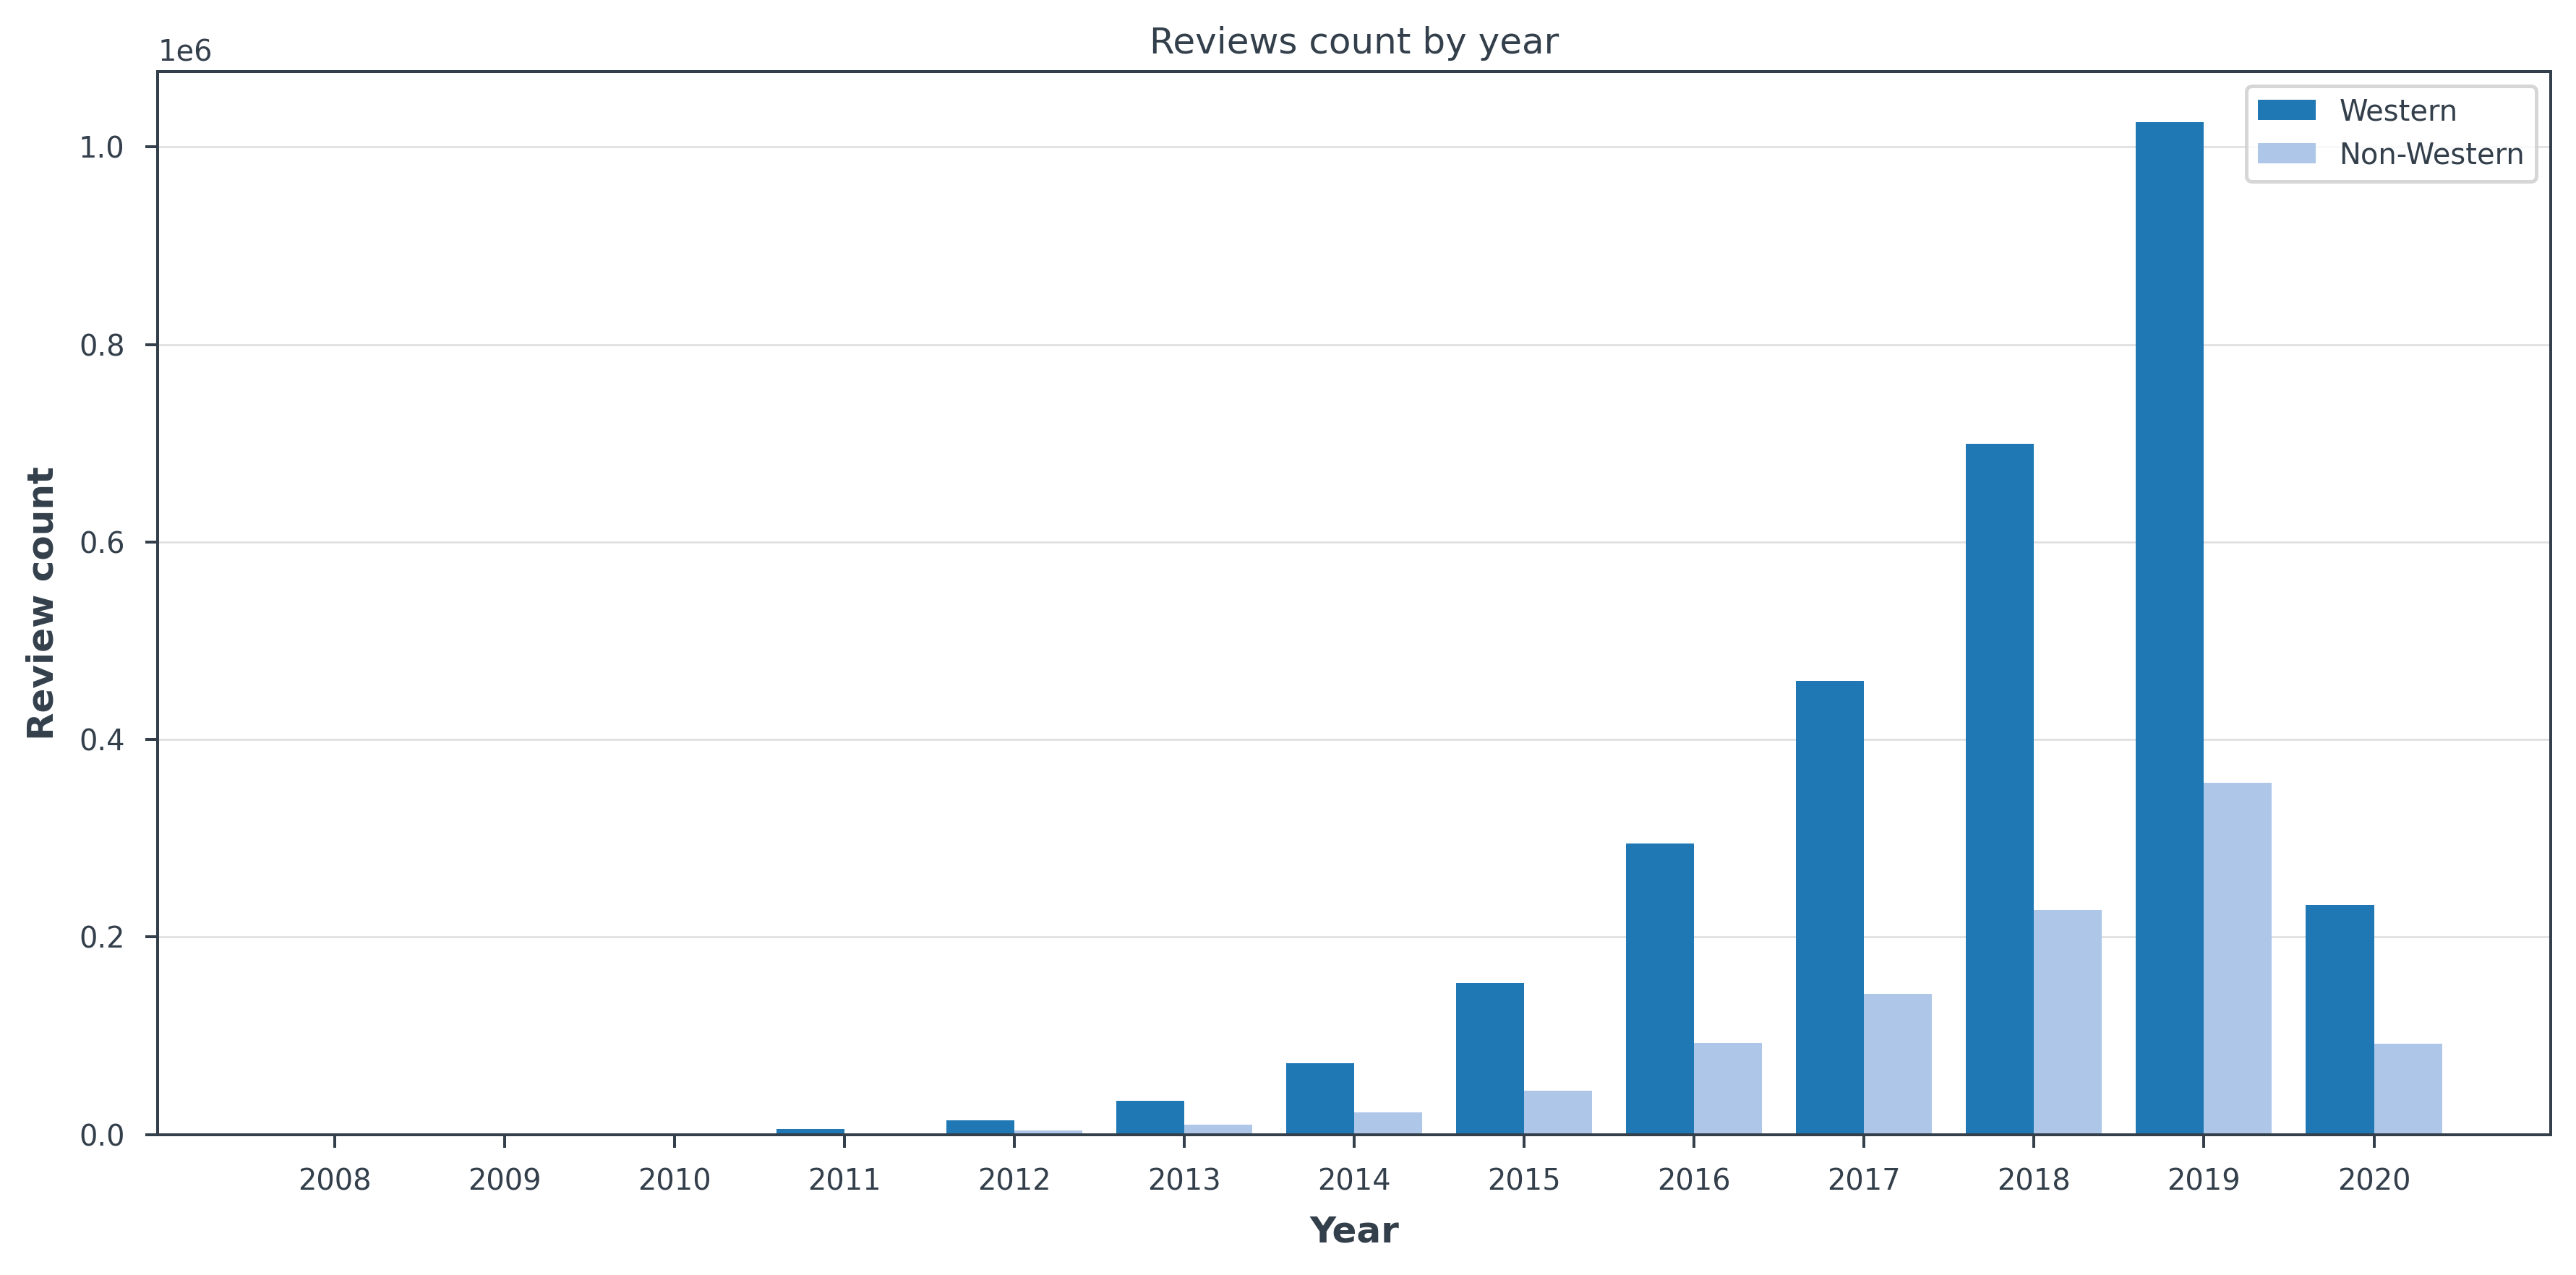

In [73]:
fig, ax = plt.subplots(figsize=(10, 5))

x = np.arange(len(western_df_english.year.unique()))
bar_width = 0.4

ax.bar(x, western_df_english.groupby('year')['comments'].count(), 
       width=bar_width, label='Western', color=color[0])
ax.bar(x[2:] + bar_width, non_western_df_english.groupby('year')['comments'].count(), 
       width=bar_width, label='Non-Western', color=color[1])

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(sorted(western_df_english.year.unique()))
ax.yaxis.grid(True)

ax.legend()

ax.set_xlabel('Year', labelpad=5)
ax.set_ylabel('Review count', labelpad=5)
ax.set_title('Reviews count by year', pad=5)

fig.tight_layout()
plt.show();

---
**FINDING**

Number of reviews increases over years in both Western and Non-Western countries.

---

### Plot reviews count by city

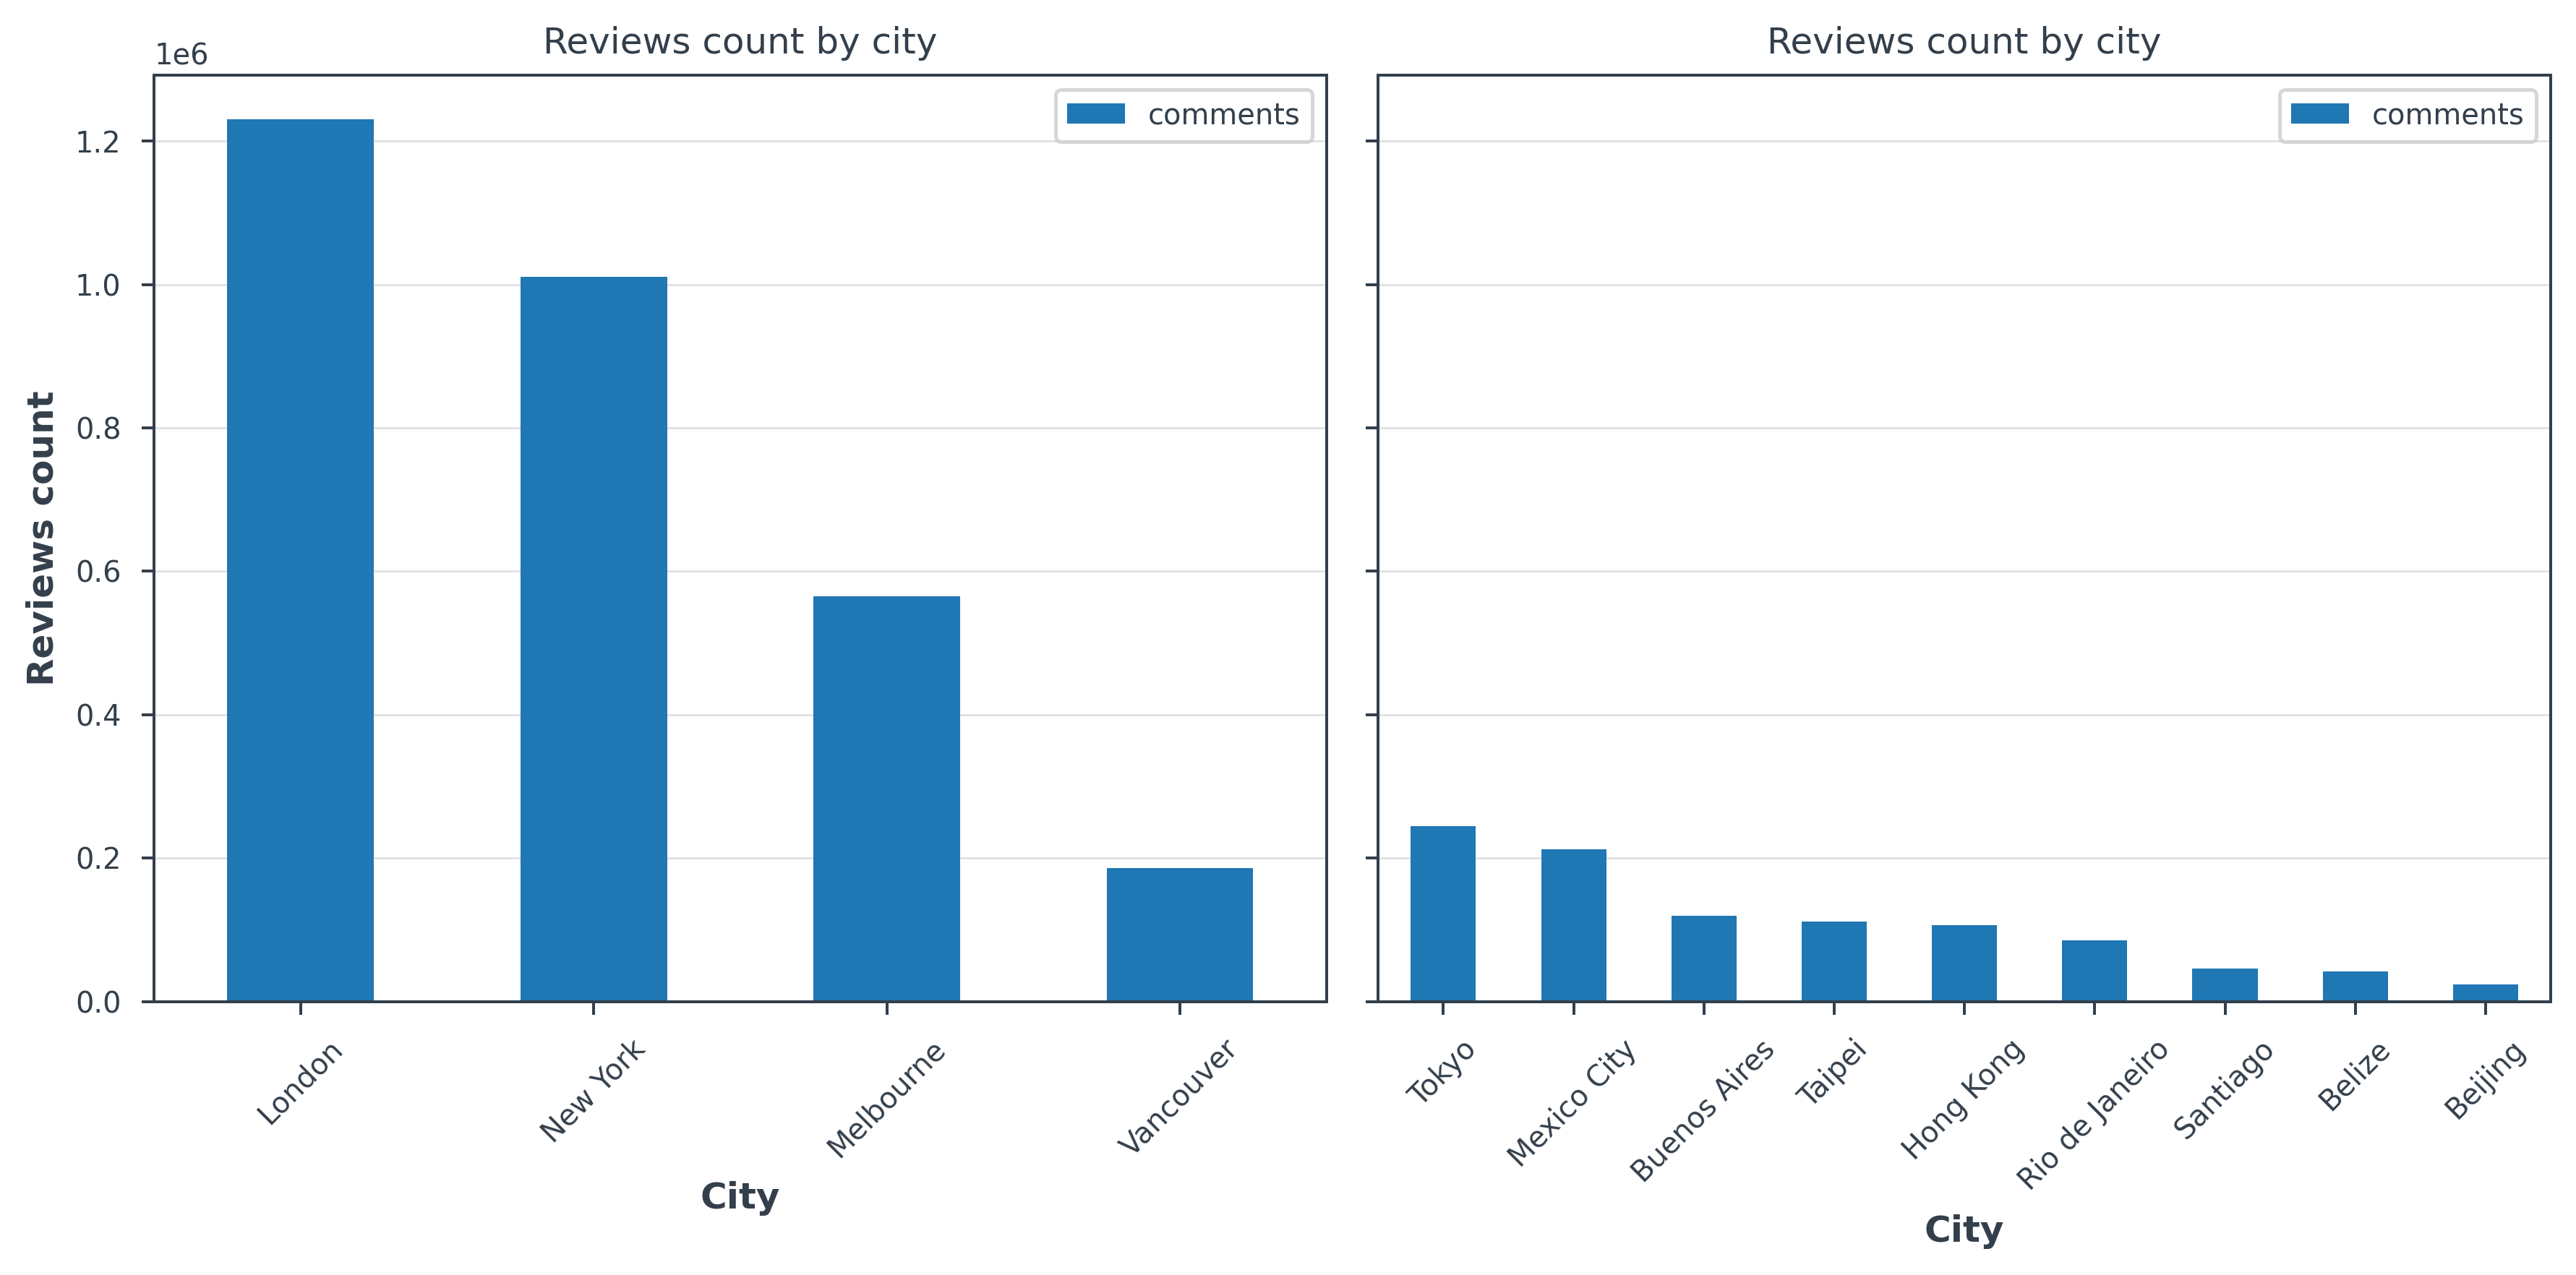

In [74]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True, constrained_layout=True)

ax1 = western_df_english.groupby('city')['comments'].count().sort_values(ascending=False).plot(x='city', kind='bar', ax=ax[0])
ax1.set_title('Reviews count by city')
ax1.set_ylabel('Reviews count')
ax1.set_xlabel('City', labelpad=5)
ax1.legend(loc='best')
ax1.yaxis.grid(True)
ax1.xaxis.set_tick_params(rotation=45)

ax2 = non_western_df_english.groupby('city')['comments'].count().sort_values(ascending=False).plot(x='city', kind='bar', ax=ax[1])
ax2.set_title('Reviews count by city')
ax2.set_xlabel('City', labelpad=5)
ax2.legend(loc='best')
ax2.yaxis.grid(True)
ax2.xaxis.set_tick_params(rotation=45)

plt.tight_layout()
plt.show();

### Plot reviews count by city and year

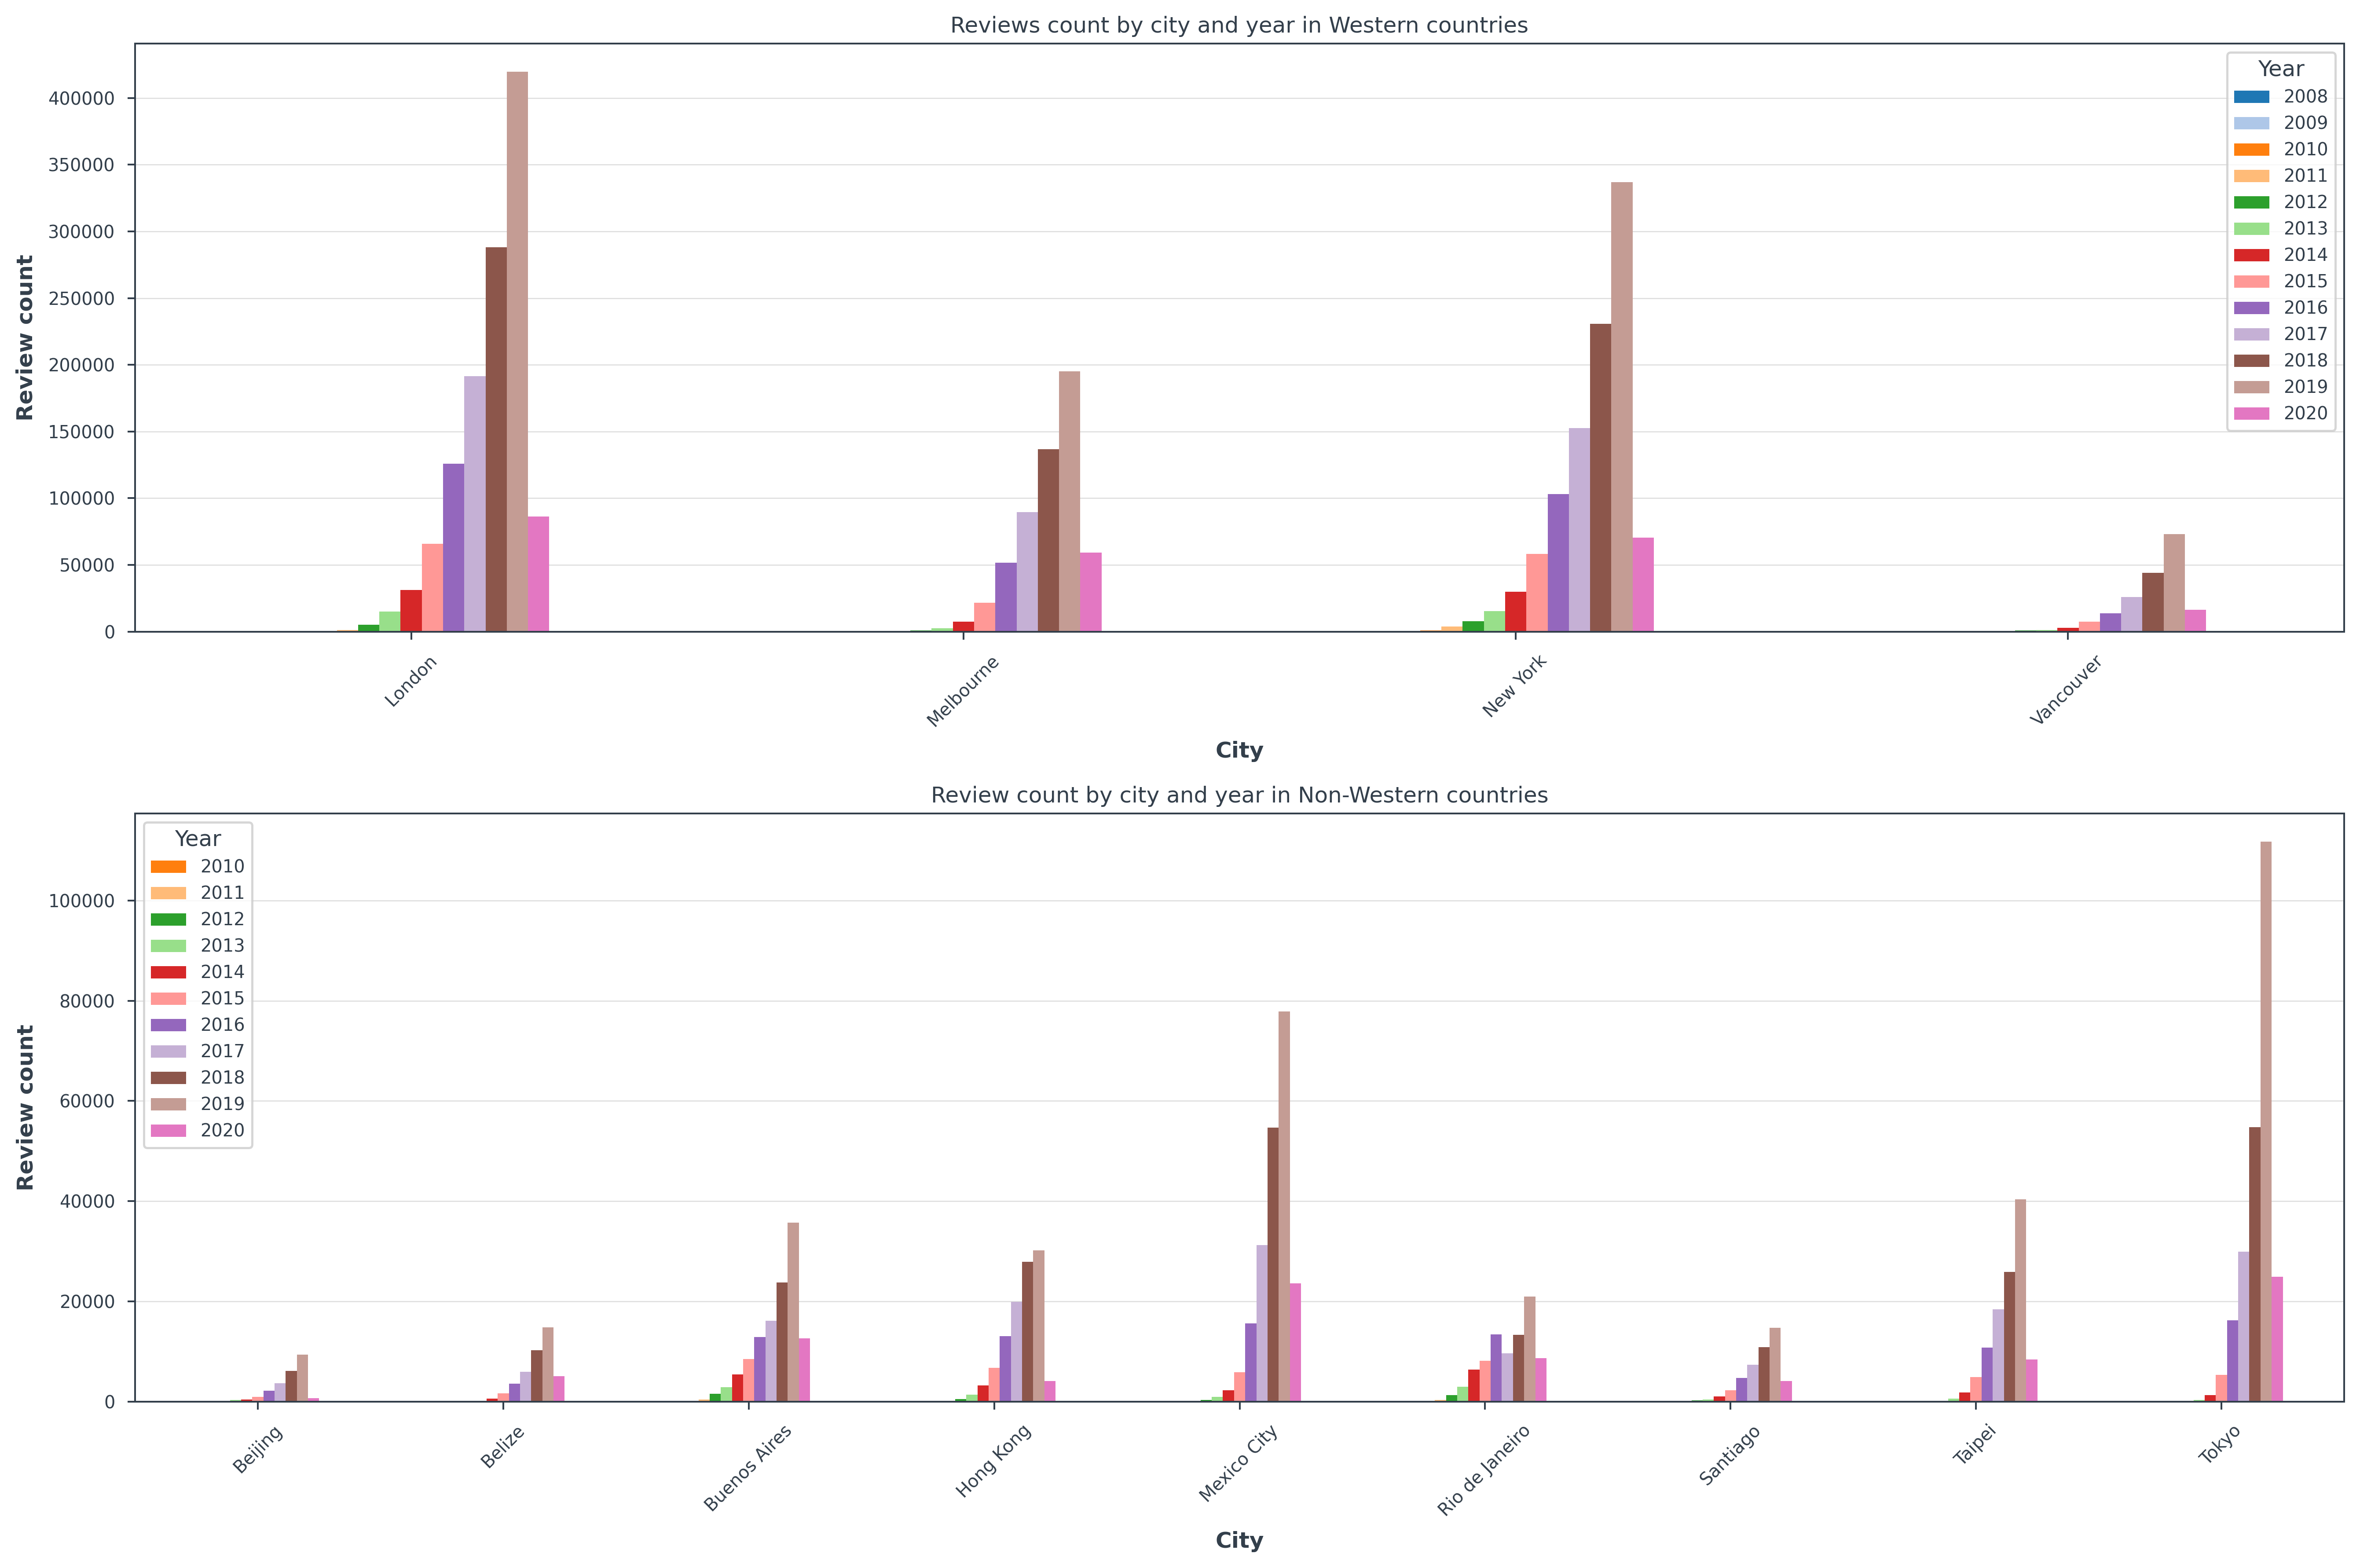

In [75]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))

ax1 = western_df_english.groupby(['city', 'year'])['comments'].count().reset_index()\
        .pivot(index='city',columns='year',values='comments').plot(kind='bar', ax=ax[0], color=color)
ax1.set_title('Reviews count by city and year in Western countries', pad=5)
ax1.set_ylabel('Review count', labelpad=5)
ax1.set_xlabel('City', labelpad=5)
ax1.yaxis.grid(True)
ax1.xaxis.set_tick_params(rotation=45)
ax1.legend(title='Year')


ax2 = non_western_df_english.groupby(['city', 'year'])['comments'].count().reset_index()\
        .pivot(index='city',columns='year',values='comments').plot(kind='bar', ax=ax[1], color=color[2:])
ax2.set_title('Review count by city and year in Non-Western countries', pad=5)
ax2.set_ylabel('Review count', labelpad=5)
ax2.set_xlabel('City', labelpad=5)
ax2.yaxis.grid(True)
ax2.xaxis.set_tick_params(rotation=45)
ax2.legend(title='Year')


fig.tight_layout()
plt.show();

---
**FINDING**

Rio de Janeiro doesn't follow the pattern. Number of reviews doesn't raise constantly.

---

### Plot mean reviews word count by year with 95% confidence interval (CI)

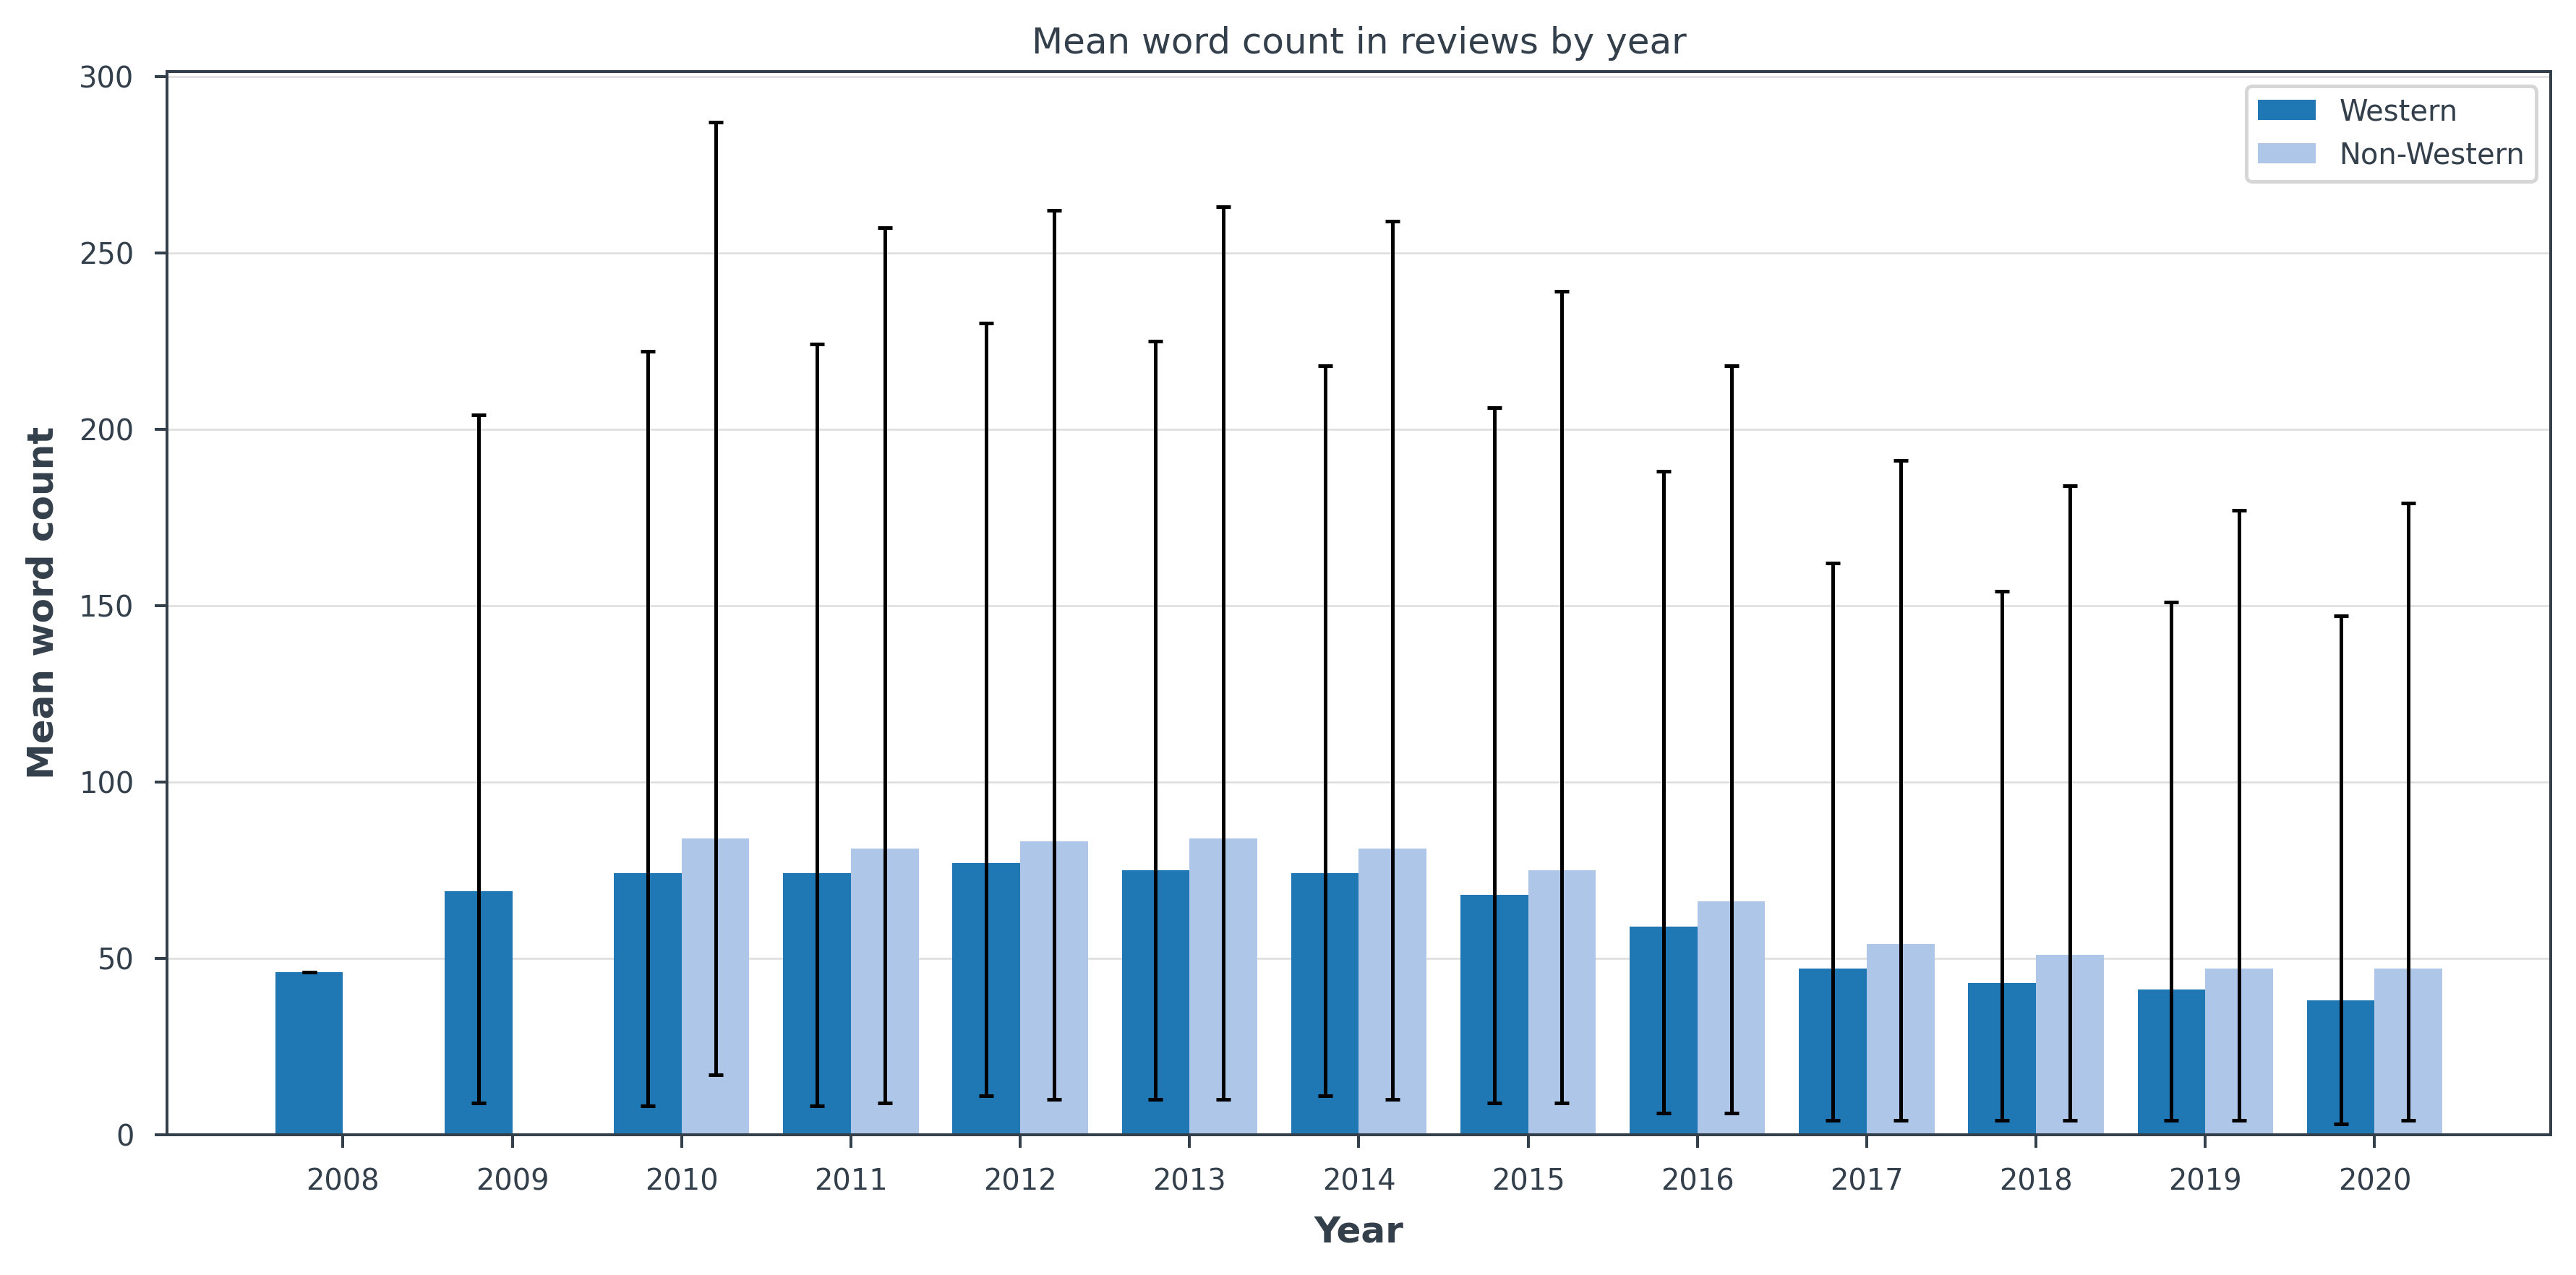

In [76]:
fig, ax = plt.subplots(figsize=(10, 5))

x = np.arange(len(western_review_word_count_by_year.year.unique()))
bar_width = 0.4

ax.bar(x, western_review_word_count_by_year['mean'], 
       yerr=[western_review_word_count_by_year['mean'] - western_review_word_count_by_year['q2'],
            western_review_word_count_by_year['q97'] - western_review_word_count_by_year['mean']],
            width=bar_width, label='Western', color=color[0])
ax.bar(x[2:] + bar_width, non_western_review_word_count_by_year['mean'],
       yerr=[non_western_review_word_count_by_year['mean'] - non_western_review_word_count_by_year['q2'],
            non_western_review_word_count_by_year['q97'] - non_western_review_word_count_by_year['mean']],
            width=bar_width, label='Non-Western', color=color[1])

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(sorted(western_review_word_count_by_year.year.unique()))
ax.yaxis.grid(True)

ax.legend()

ax.set_xlabel('Year', labelpad=5)
ax.set_ylabel('Mean word count', labelpad=5)
ax.set_title('Mean word count in reviews by year', pad=5)

fig.tight_layout()
plt.show();

---
**FINDING**

Reviews are longer on average for Non-Western countries.

---

---
**FINDING**

Review length decreases over years for both Wester and Non-Western countries.

---

### Statistics reviews word count by city

In [77]:
western_review_word_count_by_city = western_df_english.groupby('city')['review_word_count'].agg(['count', 
            'mean', 'median', 'std', 'min', q1, q2, q25, q50, q75, q97, q99, 'max']).fillna(0).reset_index().round()
western_review_word_count_by_city

city    count  mean  median   std  min  q1  q2  q25  q50  q75  q97  \
0     London  1230445  47.0      34  47.0    1   2   4   17   34   61  166   
1  Melbourne   565085  39.0      28  39.0    1   2   4   14   28   51  137   
2   New York  1010676  51.0      37  50.0    1   2   4   19   37   66  181   
3  Vancouver   186532  46.0      34  44.0    1   2   4   18   34   60  157   

   q99   max  
0  224  1029  
1  183   999  
2  243  1025  
3  211  1004

In [78]:
non_western_review_word_count_by_city = non_western_df_english.groupby('city')['review_word_count'].agg(['count', 
            'mean', 'median', 'std', 'min', q1, q2, q25, q50, q75, q97, q99, 'max']).fillna(0).reset_index().round()
non_western_review_word_count_by_city

city   count  mean  median   std  min  q1  q2  q25  q50  q75  \
0         Beijing   23781  52.0      37  55.0    1   2   4   17   37   68   
1          Belize   42257  73.0      53  71.0    1   4   6   28   53   94   
2    Buenos Aires  119955  57.0      42  54.0    1   3   5   22   42   73   
3       Hong Kong  107038  50.0      35  52.0    1   2   4   17   35   65   
4     Mexico City  212349  54.0      40  55.0    1   2   4   20   40   70   
5  Rio de Janeiro   85171  60.0      45  56.0    1   3   5   24   45   78   
6        Santiago   45779  50.0      37  48.0    1   2   4   19   37   65   
7          Taipei  111172  47.0      33  50.0    1   2   3   15   33   61   
8           Tokyo  244643  50.0      36  52.0    1   2   4   18   36   65   

   q97    q99   max  
0  193  259.0   845  
1  264  359.0  1021  
2  195  261.0  1014  
3  188  255.0  1033  
4  195  265.0  1022  
5  205  275.0  1010  
6  171  230.0  1010  
7  177  241.0  1020  
8  185  251.0  1025

### Plot mean reviews word count by city with 95% confidence interval (CI)

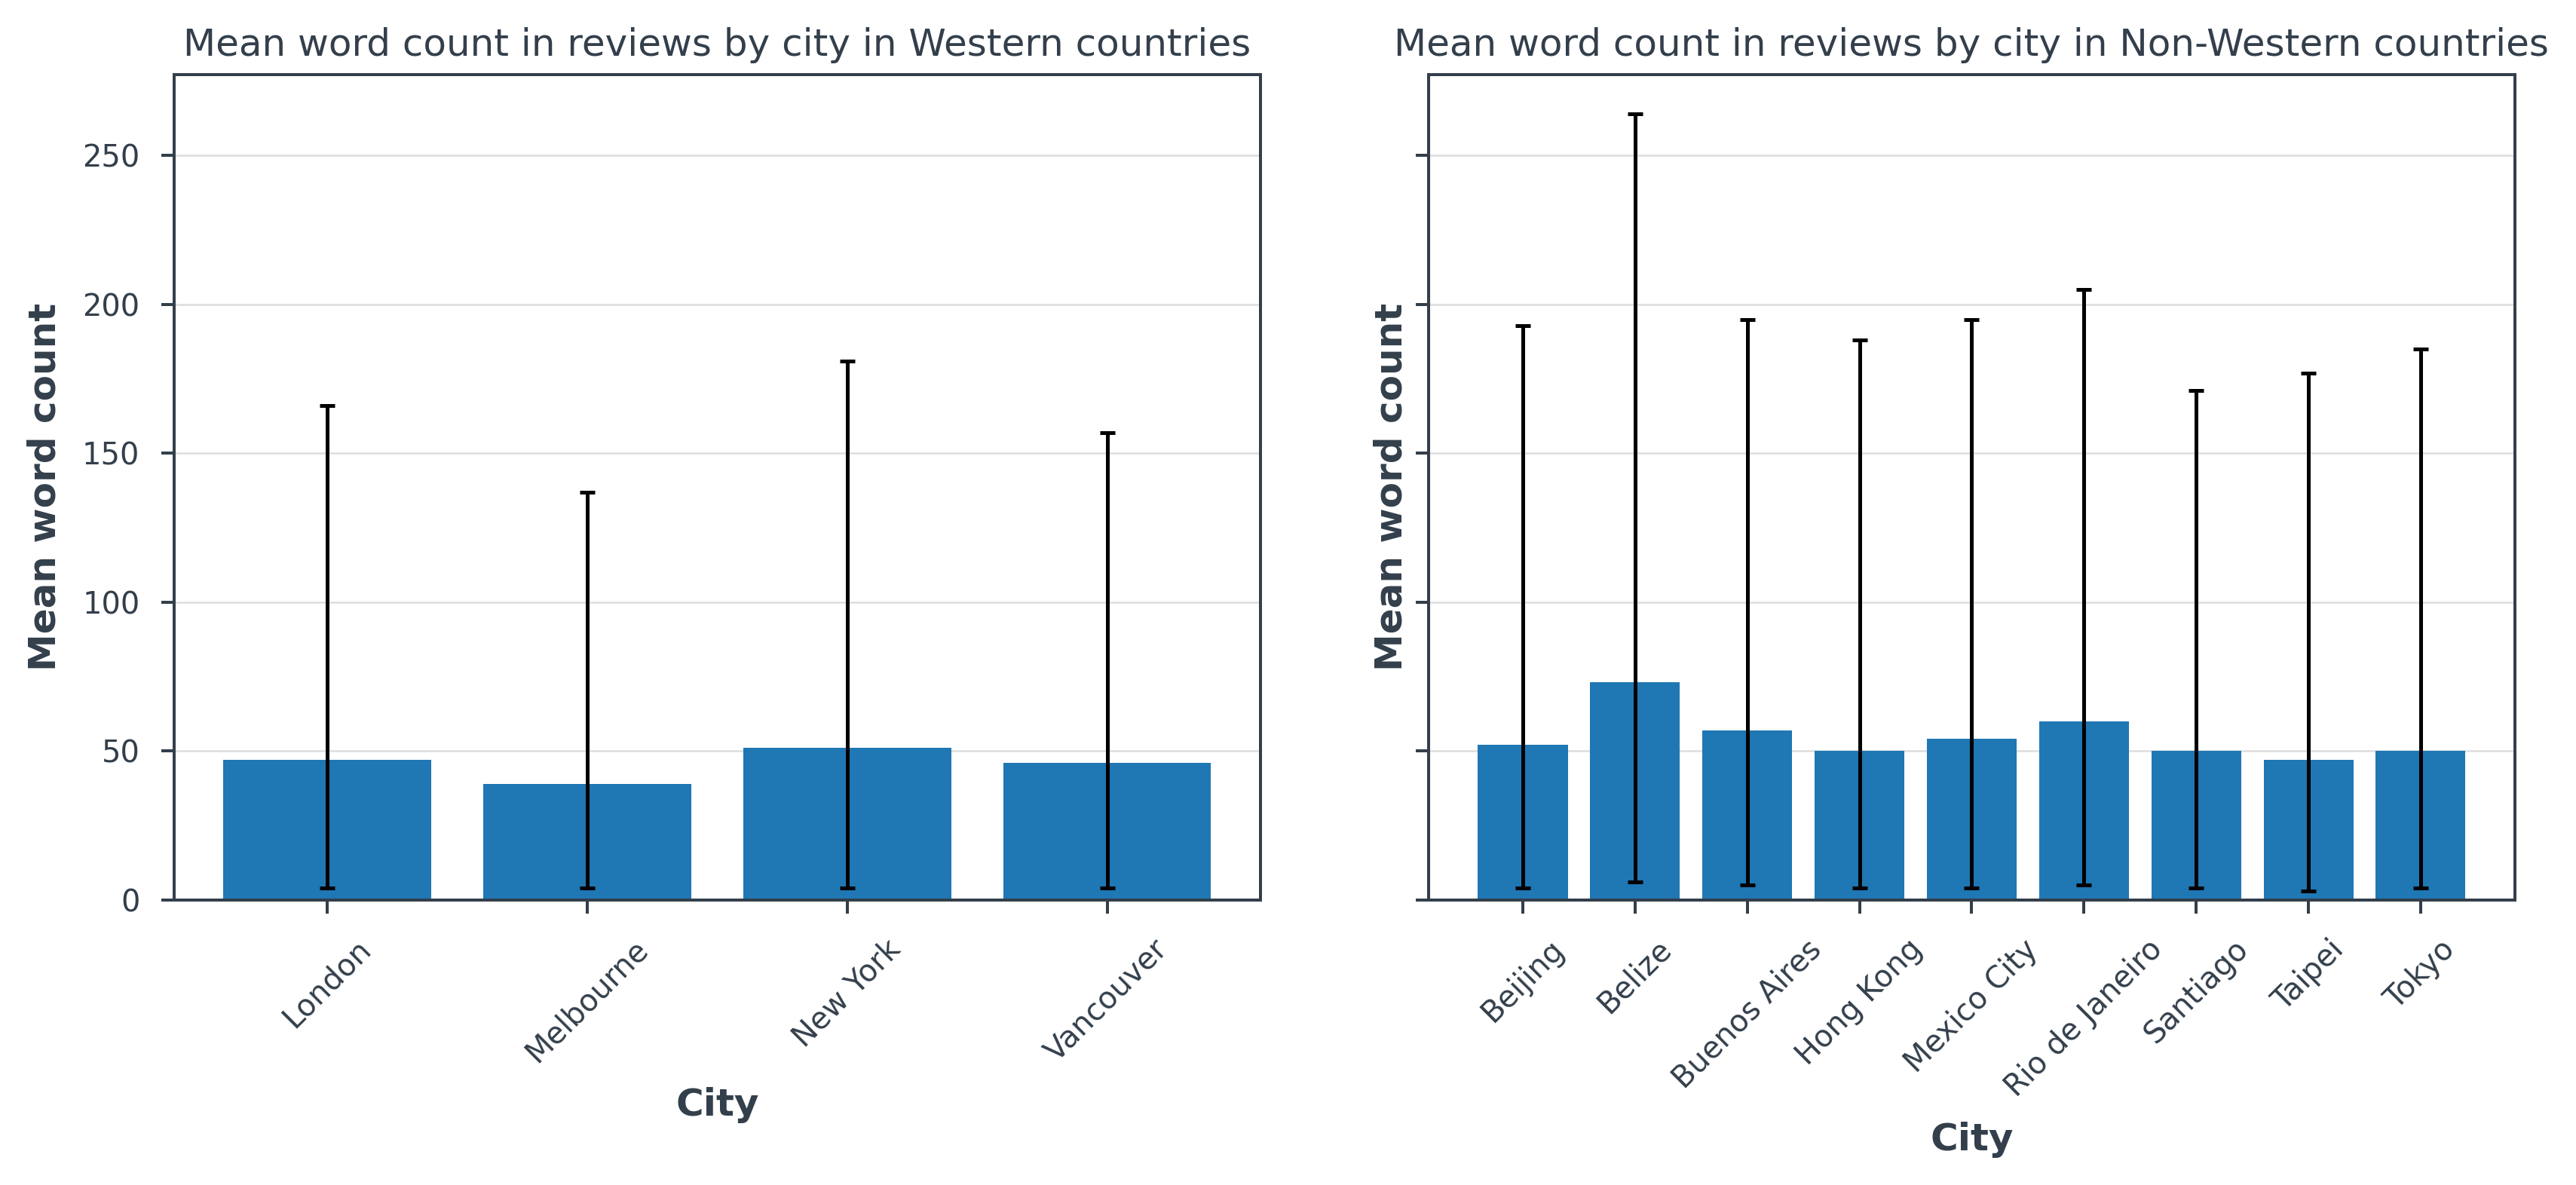

In [79]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True, constrained_layout=True)

ax[0].bar(western_review_word_count_by_city.city, western_review_word_count_by_city['mean'], 
       yerr=[western_review_word_count_by_city['mean'] - western_review_word_count_by_city['q2'],
            western_review_word_count_by_city['q97'] - western_review_word_count_by_city['mean']], color=color[0])
ax[1].bar(non_western_review_word_count_by_city.city, non_western_review_word_count_by_city['mean'], 
       yerr=[non_western_review_word_count_by_city['mean'] - non_western_review_word_count_by_city['q2'],
            non_western_review_word_count_by_city['q97'] - non_western_review_word_count_by_city['mean']], color=color[0])

ax[0].yaxis.grid(True)
ax[0].xaxis.set_tick_params(rotation=45)
ax[0].set_xlabel('City', labelpad=5)
ax[0].set_ylabel('Mean word count', labelpad=5)
ax[0].set_title('Mean word count in reviews by city in Western countries', pad=5)

ax[1].yaxis.grid(True)
ax[1].xaxis.set_tick_params(rotation=45)
ax[1].set_xlabel('City', labelpad=5)
ax[1].set_ylabel('Mean word count', labelpad=5)
ax[1].set_title('Mean word count in reviews by city in Non-Western countries', pad=5)

fig.tight_layout(pad=3)
plt.show();

---
**FINDING**

Belize has the longest reviews and the highest variation in the review length.

---

### Statistics reviews word count by city and year

In [80]:
western_review_word_count_by_city_year = western_df_english.groupby(['city', 'year'])['review_word_count'].agg(['count',
            'mean', 'median', 'std', 'min', q1, q2, q25, q50, q75, q97, q99, 'max']).fillna(0).reset_index().round()
western_review_word_count_by_city_year['error_b'] = western_review_word_count_by_city_year['mean'] - western_review_word_count_by_city_year['q2']

western_review_word_count_by_city_year['error_t'] = western_review_word_count_by_city_year['q97'] - western_review_word_count_by_city_year['mean']
western_review_word_count_by_city_year.head(15)

city  year   count  mean  median   std  min    q1    q2   q25  q50  \
0      London  2009       1  35.0      35   0.0   35  35.0  35.0  35.0   35   
1      London  2010     159  78.0      61  62.0    5   6.0   9.0  34.0   61   
2      London  2011    1226  74.0      60  59.0    4   6.0   8.0  36.0   60   
3      London  2012    5074  72.0      59  56.0    1   7.0  10.0  35.0   59   
4      London  2013   15008  73.0      59  57.0    1   7.0  10.0  36.0   59   
5      London  2014   31369  71.0      58  54.0    1   7.0  10.0  35.0   58   
6      London  2015   65950  66.0      54  52.0    1   6.0   9.0  32.0   54   
7      London  2016  126018  58.0      46  49.0    1   4.0   6.0  26.0   46   
8      London  2017  191353  47.0      35  45.0    1   3.0   4.0  18.0   35   
9      London  2018  287983  44.0      32  44.0    1   2.0   4.0  16.0   32   
10     London  2019  419834  42.0      29  45.0    1   2.0   4.0  15.0   29   
11     London  2020   86470  39.0      26  45.0    1   2.0   3.0  13.0   26   
12  Melbourne  2010      15  70.0      57  46.0    7   9.0  13.0  40.0   57   
13  Melbourne  2011     274  68.0      57  49.0    2   7.0  12.0  36.0   57   
14  Melbourne  2012     829  71.0      57  55.0    4  10.0  13.0  36.0   57   

      q75    q97    q99   max  error_b  error_t  
0    35.0   35.0   35.0    35      0.0      0.0  
1   105.0  243.0  296.0   313     69.0    165.0  
2    94.0  226.0  310.0   495     66.0    152.0  
3    93.0  209.0  282.0   800     62.0    137.0  
4    93.0  221.0  296.0   508     63.0    148.0  
5    91.0  213.0  271.0   507     61.0    142.0  
6    85.0  201.0  259.0   520     57.0    135.0  
7    75.0  184.0  242.0   524     52.0    126.0  
8    61.0  162.0  216.0   550     43.0    115.0  
9    57.0  154.0  209.0  1029     40.0    110.0  
10   53.0  154.0  215.0  1020     38.0    112.0  
11   50.0  151.0  213.0  1000     36.0    112.0  
12   83.0  153.0  154.0   154     57.0     83.0  
13   90.0  199.0  265.0   323     56.0    131.0  
14   86.0  200.0  292.0   501     58.0    129.0

In [81]:
non_western_review_word_count_by_city_year = non_western_df_english.groupby(['city', 'year'])['review_word_count'].agg(['count',
            'mean', 'median', 'std', 'min', q1, q2, q25, q50, q75, q97, q99, 'max']).fillna(0).reset_index().round()
non_western_review_word_count_by_city_year['error_b'] = non_western_review_word_count_by_city_year['mean']\
                                                        - non_western_review_word_count_by_city_year['q2']
non_western_review_word_count_by_city_year['error_t'] = non_western_review_word_count_by_city_year['q97']\
                                                        - non_western_review_word_count_by_city_year['mean']
non_western_review_word_count_by_city_year.head(10)

city  year  count   mean  median   std  min    q1    q2   q25    q50  \
0  Beijing  2010      2   96.0    96.0  83.0   38  39.0  41.0  67.0   96.0   
1  Beijing  2011     24  128.0   114.0  70.0   22  22.0  23.0  75.0  114.0   
2  Beijing  2012    114   98.0    72.0  83.0    2  12.0  18.0  46.0   72.0   
3  Beijing  2013    282   88.0    70.0  64.0    6  10.0  13.0  42.0   70.0   
4  Beijing  2014    447   87.0    70.0  64.0    5   6.0   8.0  42.0   70.0   
5  Beijing  2015    928   79.0    61.0  66.0    1   5.0   8.0  37.0   61.0   
6  Beijing  2016   2129   65.0    50.0  58.0    1   4.0   6.0  28.0   50.0   
7  Beijing  2017   3638   53.0    40.0  50.0    1   2.0   4.0  20.0   40.0   
8  Beijing  2018   6103   49.0    34.0  51.0    1   2.0   4.0  17.0   34.0   
9  Beijing  2019   9402   46.0    30.0  53.0    1   2.0   3.0  14.0   30.0   

     q75    q97    q99  max  error_b  error_t  
0  126.0  152.0  154.0  155     55.0     56.0  
1  173.0  260.0  263.0  265    105.0    132.0  
2  110.0  303.0  362.0  496     80.0    205.0  
3  115.0  256.0  261.0  427     75.0    168.0  
4  112.0  253.0  308.0  399     79.0    166.0  
5  104.0  229.0  333.0  512     71.0    150.0  
6   85.0  213.0  306.0  501     59.0    148.0  
7   69.0  181.0  246.0  510     49.0    128.0  
8   64.0  179.0  250.0  746     45.0    130.0  
9   59.0  176.0  245.0  845     43.0    130.0

### Plot mean reviews word count by city and year with 95% confidence interval (CI)

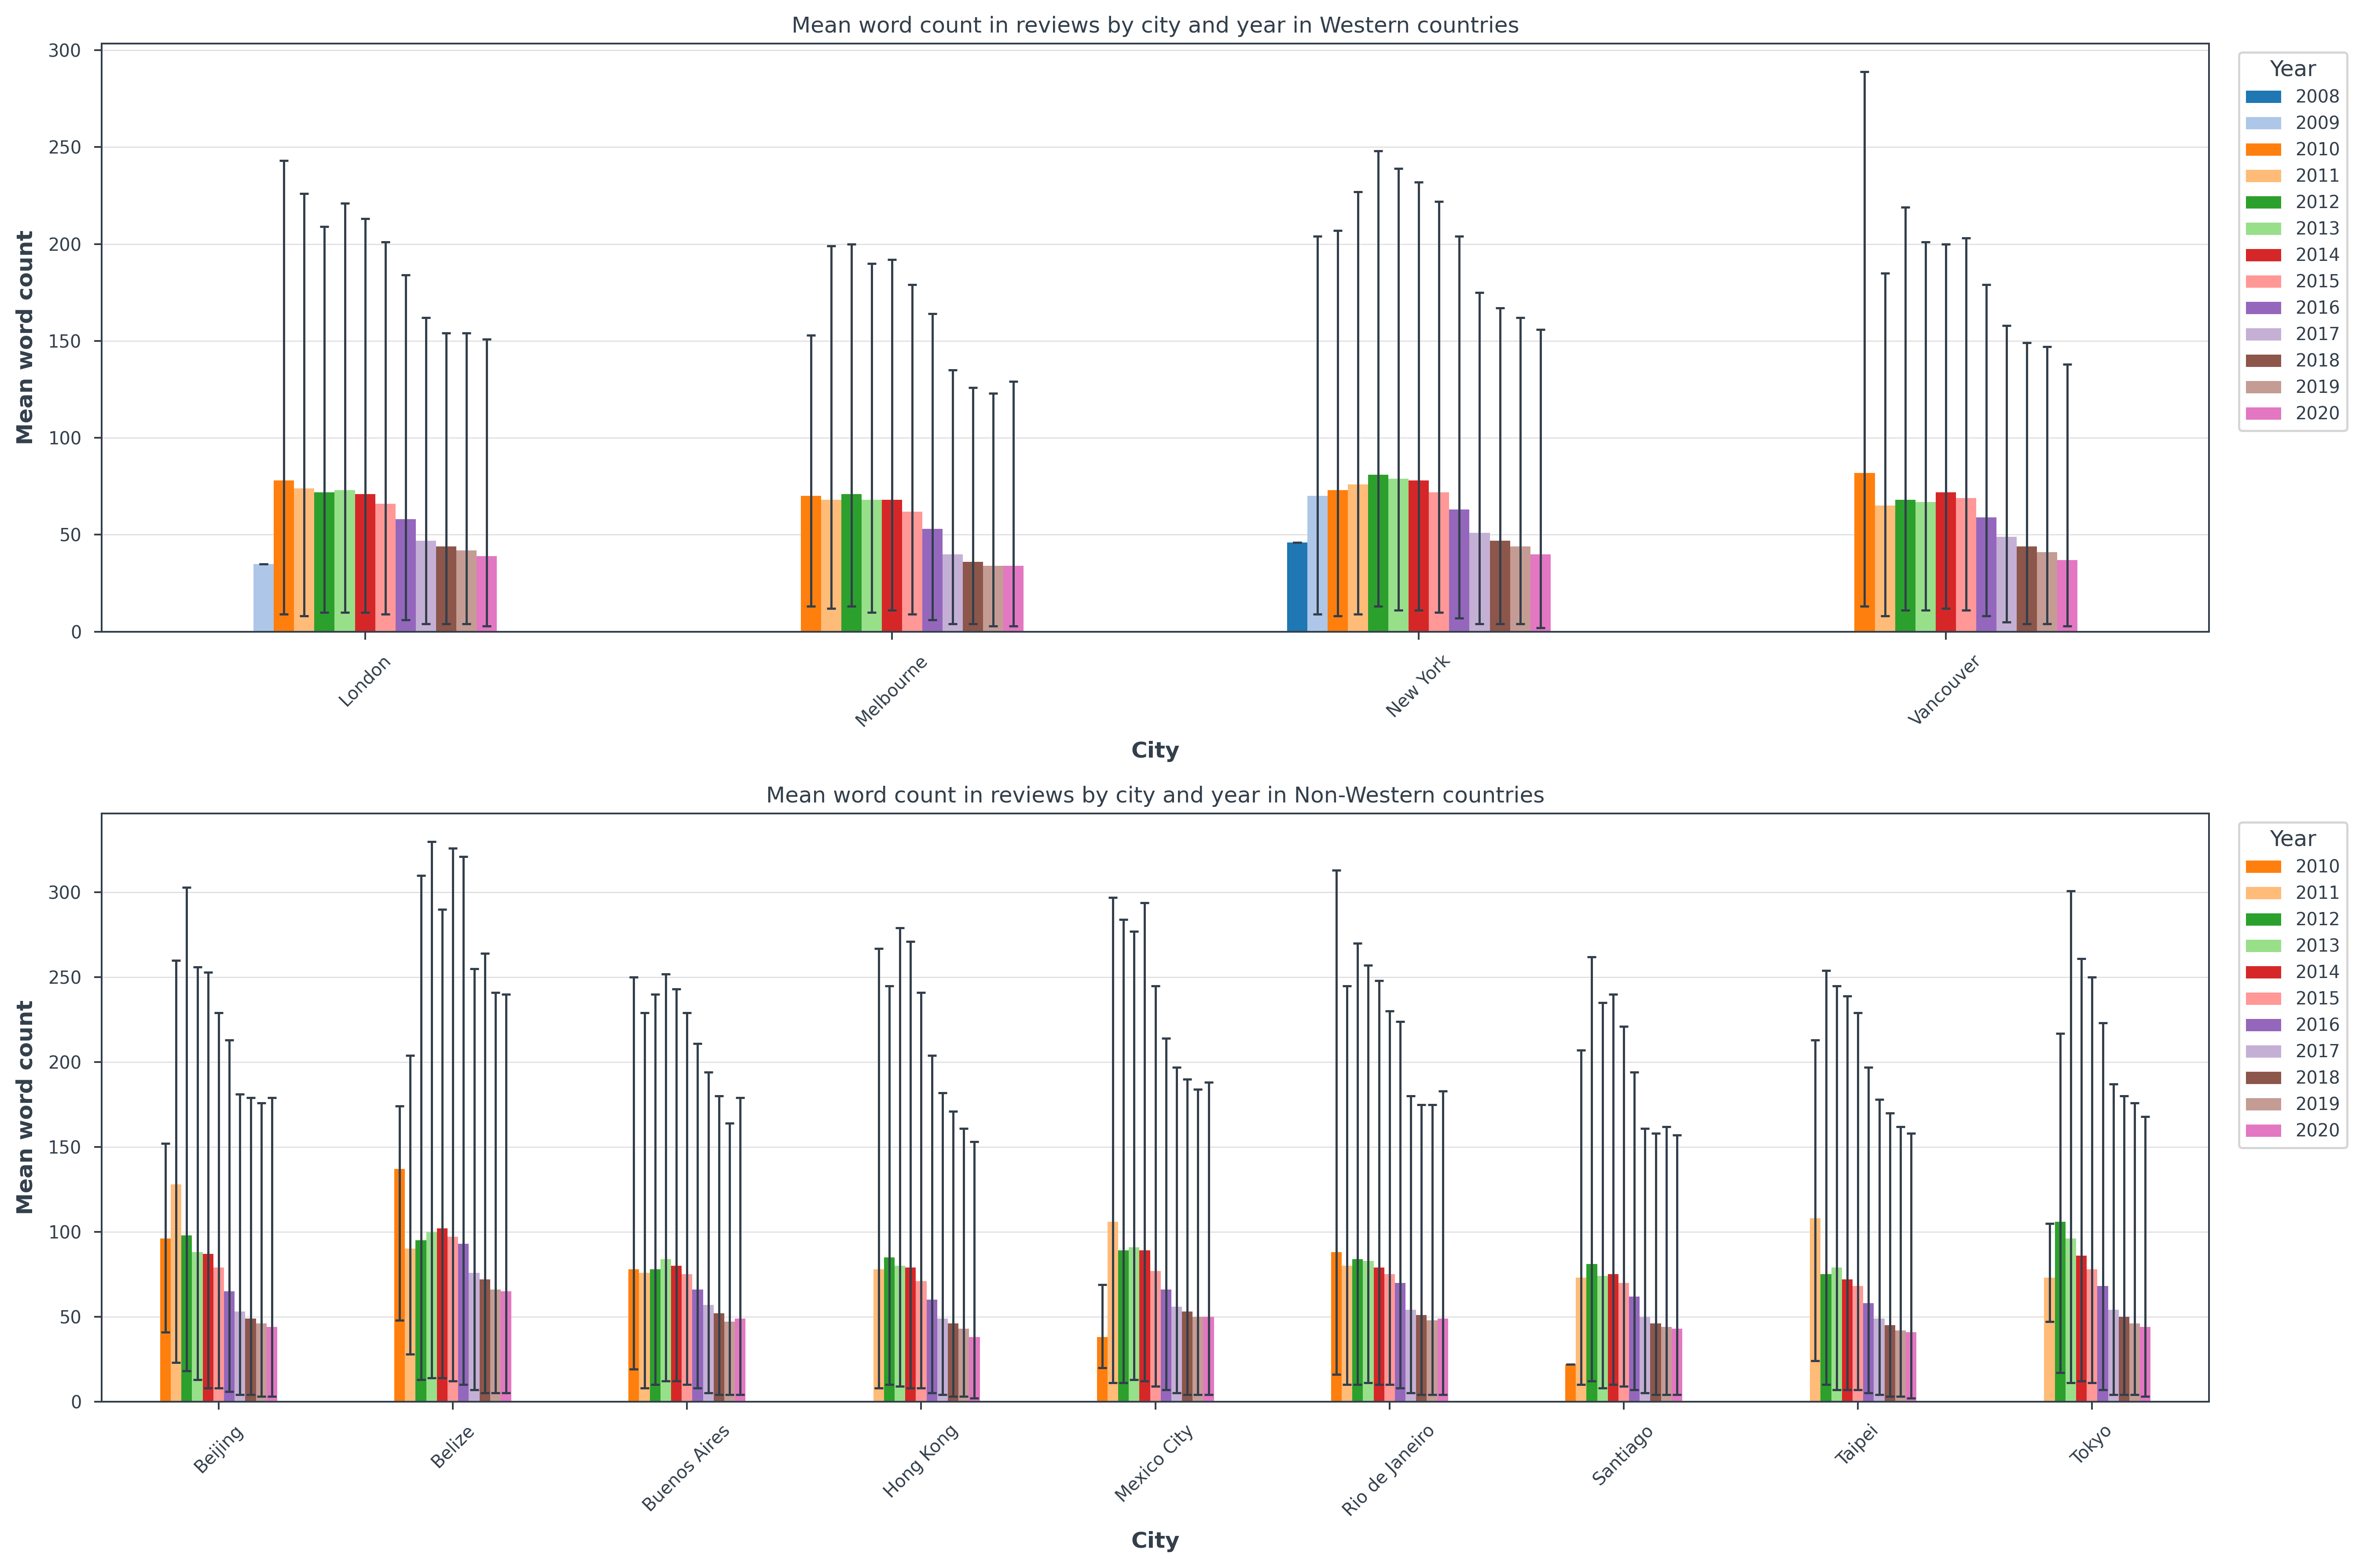

In [82]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))

ax1 = western_review_word_count_by_city_year.pivot(index='city',columns='year',values='mean').plot(kind='bar', ax=ax[0], color=color,
        yerr=np.array(list(zip(western_review_word_count_by_city_year.pivot(index='city',columns='year',values='error_b').values.T, 
                               western_review_word_count_by_city_year.pivot(index='city',columns='year',values='error_t').values.T))))
ax1.set_title('Mean word count in reviews by city and year in Western countries', pad=5)
ax1.set_ylabel('Mean word count', labelpad=5)
ax1.set_xlabel('City', labelpad=5)
ax1.yaxis.grid(True)
ax1.xaxis.set_tick_params(rotation=45)
ax1.legend(bbox_to_anchor=(1.01, 1), loc='upper left', title='Year')

ax2 = non_western_review_word_count_by_city_year.pivot(index='city',columns='year',values='mean').plot(kind='bar', ax=ax[1], color=color[2:],
        yerr=np.array(list(zip(non_western_review_word_count_by_city_year.pivot(index='city',columns='year',values='error_b').values.T, 
                               non_western_review_word_count_by_city_year.pivot(index='city',columns='year',values='error_t').values.T))))
ax2.set_title('Mean word count in reviews by city and year in Non-Western countries', pad=5)
ax2.set_ylabel('Mean word count', labelpad=5)
ax2.set_xlabel('City', labelpad=5)
ax2.yaxis.grid(True)
ax2.xaxis.set_tick_params(rotation=45)
ax2.legend(bbox_to_anchor=(1.01, 1), loc='upper left', title='Year')

fig.tight_layout()
plt.show();

### List of comments with word count between 4 and 8

In [83]:
non_western_df_english.comments_cleaned[(non_western_df_english['review_word_count'] <= 8) & 
                                        (non_western_df_english['review_word_count'] >= 4)].tolist()

['Service excellent. Internet connection not very good',
 'had a great time living in this department',
 'very satisfied. Recommended to everyone',
 'Great Host. Nice room with wonderful view',
 'Interesting experience has learned a lot',
 'Great place and great hosts. Would stay again',
 'Great location and super friendly host',
 'Cindy is very attentive and helpful',
 'Cheap and clean apartment. Good location',
 'Nice place in the center of Beijing',
 'The apartment is very well located',
 'It was nice clean and good loacation',
 'Disappointed dirty not even in an acceptable condition',
 'Great place in convenient location',
 'Vera is kind and the experience is excellent',
 'Great communication very helpful host. Highly recommend',
 'Very good location and amendment. Thanks for hospitality',
 'Very easy to receive instructions from. Lovely house',
 'Great Host. Will come back',
 'We made it to chicago',
 'Great host and cat',
 'Great experience. Great location n helpful host',
 'Good

### Count number of reviews with 'review_word_count' below 8 words

In [84]:
print('Number of reviews containing less than 8 words in Western countries: {}'.format(western_df_english.review_word_count[
                                                            western_df_english['review_word_count'] < 8].count()))

Number of reviews containing less than 8 words in Western countries: 251202


In [85]:
print('Number of reviews containing less than 8 words in Non-Western countries: {}'.format(non_western_df_english.review_word_count[
                                                            non_western_df_english['review_word_count'] < 8].count()))

Number of reviews containing less than 8 words in Non-Western countries: 77406


### Remove too short (<8 words) and too long reviews (>97.5%ile)

In [86]:
western_df_english_final = western_df_english[(western_df_english['review_word_count'] > 7) & 
                                            (western_df_english['review_word_count'] <= 
                                            int(round(np.quantile(western_df_english.review_word_count, q=0.975))))]

In [87]:
western_total_number_english_reviews = western_df_english.shape[0]
western_total_number_english_reviews_without_short_long = western_df_english_final.shape[0]
print('Total number of English reviews in Western countries: {}'.format(western_total_number_english_reviews))
print('Total number of English reviews after removing too short and too long reviews: {}'.format(
                                                            western_total_number_english_reviews_without_short_long))
print('Percentage of reviews left: {:.0%}'.format(western_total_number_english_reviews_without_short_long/
                                                            western_total_number_english_reviews))

Total number of English reviews in Western countries: 2992738
Total number of English reviews after removing too short and too long reviews: 2667359
Percentage of reviews left: 89%


In [88]:
non_western_df_english_final = non_western_df_english[(non_western_df_english['review_word_count'] > 7) & 
                                        (non_western_df_english['review_word_count'] <= 
                                         int(round(np.quantile(non_western_df_english.review_word_count, q=0.975))))]

In [89]:
non_western_total_number_english_reviews = non_western_df_english.shape[0]
non_western_total_number_english_reviews_without_short_long = non_western_df_english_final.shape[0]
print('Total number of English reviews in Non-Western countries: {}'.format(non_western_total_number_english_reviews))
print('Total number of English reviews after removing too short and too long reviews: {}'.format(
                                                        non_western_total_number_english_reviews_without_short_long))
print('Percentage of reviews left: {:.0%}'.format(non_western_total_number_english_reviews_without_short_long/
                                                        non_western_total_number_english_reviews))

Total number of English reviews in Non-Western countries: 992145
Total number of English reviews after removing too short and too long reviews: 890040
Percentage of reviews left: 90%


In [90]:
non_western_df_english_final.groupby('city').size()

city
Beijing            20892
Belize             38096
Buenos Aires      109980
Hong Kong          94213
Mexico City       191874
Rio de Janeiro     78076
Santiago           41711
Taipei             96842
Tokyo             218356
dtype: int64

In [91]:
western_df_english_final.groupby('city').size()

city
London       1101208
Melbourne     498593
New York      899644
Vancouver     167914
dtype: int64

---
**Question?** 

Is it ok to choose two different 97.5%iles for each data set accordingly or it is better to pick the same value (for example mean 97.5%ile) for both data sets?

---

In [36]:
western_df_english_final.to_pickle('western_df_english_cleaned_final.pkl')

In [37]:
non_western_df_english_final.to_pickle('non_western_df_english_cleaned_final.pkl')